# GAN_2D_Example

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn, optim
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Prepare Data

Text(0,0.5,'y1')

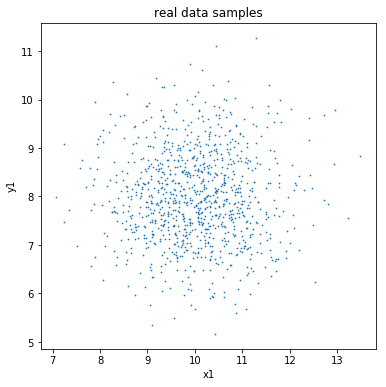

In [2]:
def sample_real(batch_size=100):
    x = torch.randn(batch_size, 2)   # x ~ N(mu=0,std=1)
    x[:,0] += 10
    x[:,1] += 8
    return x

plt.figure(figsize=[6,6])
x = sample_real(1000).numpy()
plt.scatter(x[:,0],x[:,1],0.5)
plt.title('real data samples')
plt.xlabel('x1')
plt.ylabel('y1')

## Define GAN model

In [9]:
# Discriminator
D = nn.Sequential(
    nn.Linear(2, 10),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(10, 1))
    #,
    #nn.Sigmoid())

# Generator
z_dim = 10
G = nn.Sequential(
    nn.Linear(z_dim, 20),
    nn.LeakyReLU(0.2),
#     nn.Linear(50, 50),
#     nn.ReLU(),
    nn.Linear(20, 2))

D.to(device)
G.to(device)

Sequential(
  (0): Linear(in_features=10, out_features=20, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=20, out_features=2, bias=True)
)

## Training GAN Model

In [15]:
batch_size = 300

#a helper function to plot results
def plot_decoder():
    plt.figure(figsize=[5,5])

    z = Variable(torch.randn(batch_size, z_dim)).to(device)
    x_gen = G(z).detach().cpu().numpy()
    
    plt.scatter(x_gen[:,0],x_gen[:,1],0.8)
    
    x_real = sample_real(batch_size).numpy()
    plt.scatter(x_real[:,0],x_real[:,1],0.8)
    plt.legend(['GAN','Real Data'])
    
    plt.xlim([-1,11])
    plt.ylim([-1,11])
    return x_gen.mean(0), x_gen.std(0)

In [16]:
max_epoch = 100000

# Binary cross entropy loss and optimizer
#criterion = nn.BCELoss()
criterion = nn.MSELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0001)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

Epoch [0/100000], d_loss: 0.0384, g_loss: 1.3516, D(x): 0.98, D(G(z)): -0.16


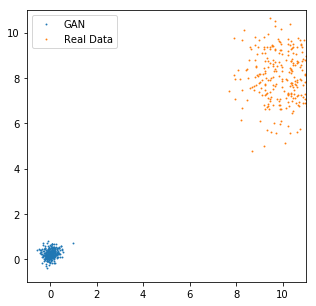

mean=[0.01976073 0.24785481], std=[0.20229854 0.19722405]
Epoch [500/100000], d_loss: 0.0107, g_loss: 0.9135, D(x): 0.99, D(G(z)): 0.04


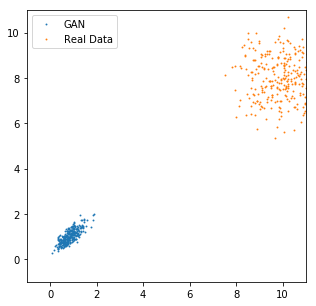

mean=[0.8290294 1.0113143], std=[0.31122985 0.3048264 ]
Epoch [1000/100000], d_loss: 0.0223, g_loss: 0.8168, D(x): 0.95, D(G(z)): 0.10


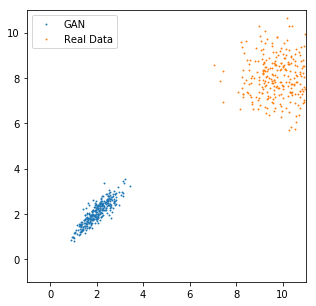

mean=[2.0146425 2.0755072], std=[0.4950717 0.5158715]
Epoch [1500/100000], d_loss: 0.0645, g_loss: 0.6764, D(x): 0.90, D(G(z)): 0.18


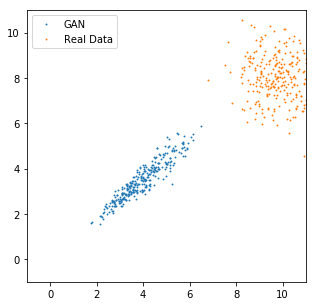

mean=[3.9383488 3.4912398], std=[0.9505999 0.8693451]
Epoch [2000/100000], d_loss: 0.2228, g_loss: 0.4676, D(x): 0.74, D(G(z)): 0.34


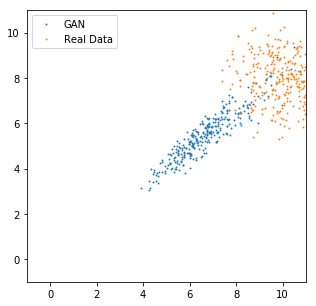

mean=[6.6931334 5.5000353], std=[1.2910889 1.098892 ]
Epoch [2500/100000], d_loss: 0.4880, g_loss: 0.3062, D(x): 0.49, D(G(z)): 0.44


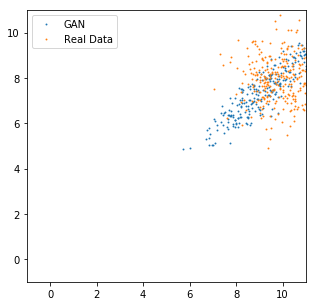

mean=[9.750988 7.894987], std=[1.7637919 1.5171468]
Epoch [3000/100000], d_loss: 0.7462, g_loss: 0.2789, D(x): 0.33, D(G(z)): 0.52


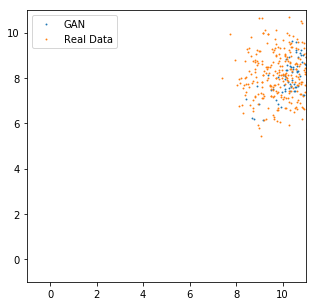

mean=[12.652107  9.832337], std=[1.8495643 1.6269248]
Epoch [3500/100000], d_loss: 0.7939, g_loss: 0.2877, D(x): 0.26, D(G(z)): 0.48


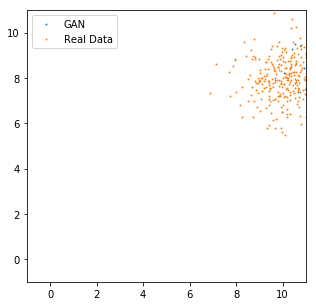

mean=[15.178071 11.944449], std=[2.2938802 2.1564808]
Epoch [4000/100000], d_loss: 0.7479, g_loss: 0.3475, D(x): 0.25, D(G(z)): 0.43


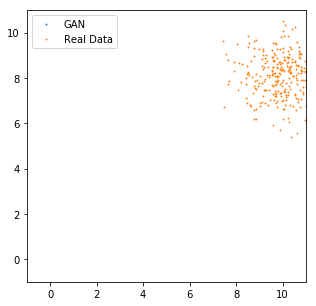

mean=[17.377806 13.536489], std=[2.632555 2.74963 ]
Epoch [4500/100000], d_loss: 0.6443, g_loss: 0.3924, D(x): 0.29, D(G(z)): 0.37


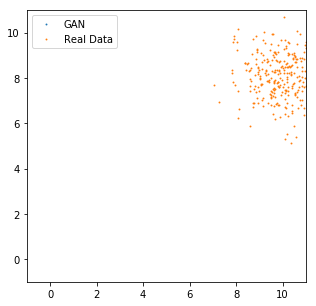

mean=[19.1132   15.152347], std=[3.008319  3.1189976]
Epoch [5000/100000], d_loss: 0.5266, g_loss: 0.4417, D(x): 0.36, D(G(z)): 0.34


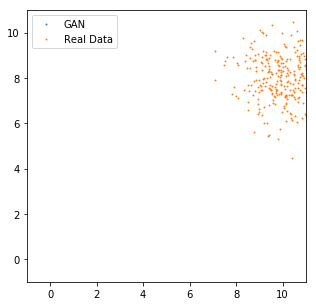

mean=[19.741493 15.520863], std=[3.3335774 3.053026 ]
Epoch [5500/100000], d_loss: 0.4315, g_loss: 0.4577, D(x): 0.43, D(G(z)): 0.32


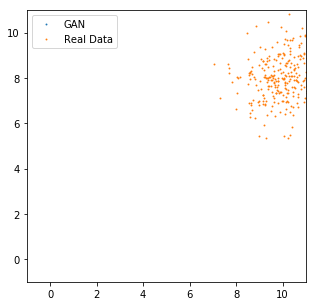

mean=[18.100485 14.342832], std=[3.015874  2.7701993]
Epoch [6000/100000], d_loss: 0.4145, g_loss: 0.3994, D(x): 0.48, D(G(z)): 0.37


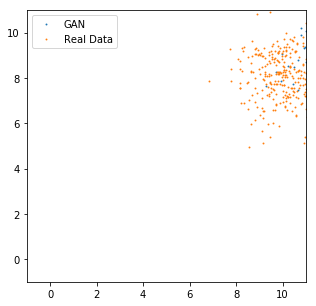

mean=[14.138867 11.269301], std=[1.9501731 1.7891831]
Epoch [6500/100000], d_loss: 0.4873, g_loss: 0.2708, D(x): 0.50, D(G(z)): 0.49


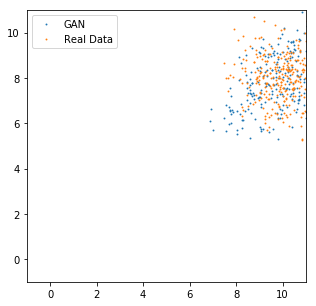

mean=[10.529428  8.362481], std=[1.75865   1.5973908]
Epoch [7000/100000], d_loss: 0.5492, g_loss: 0.1738, D(x): 0.54, D(G(z)): 0.58


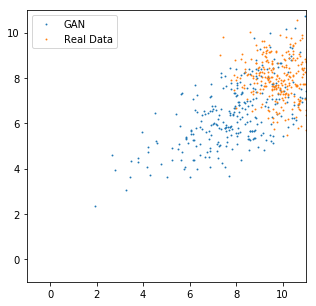

mean=[8.107907  6.5119042], std=[1.8779536 1.4790145]
Epoch [7500/100000], d_loss: 0.5040, g_loss: 0.1803, D(x): 0.58, D(G(z)): 0.57


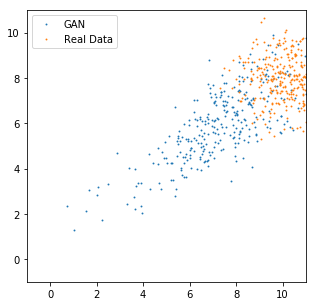

mean=[7.347883  5.9744463], std=[1.9840531 1.6511207]
Epoch [8000/100000], d_loss: 0.4846, g_loss: 0.2241, D(x): 0.55, D(G(z)): 0.53


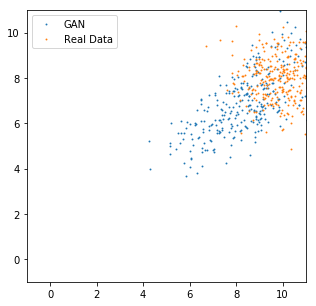

mean=[8.458281 6.9643  ], std=[1.5989816 1.4788096]
Epoch [8500/100000], d_loss: 0.4985, g_loss: 0.2637, D(x): 0.49, D(G(z)): 0.48


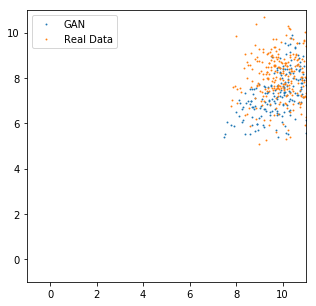

mean=[10.824944  8.027414], std=[1.6511736 1.4640547]
Epoch [9000/100000], d_loss: 0.5118, g_loss: 0.2785, D(x): 0.46, D(G(z)): 0.47


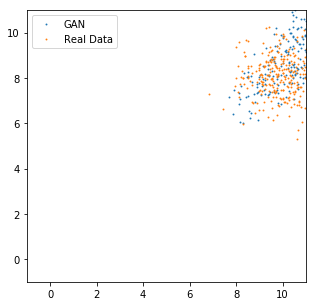

mean=[11.072909  9.450295], std=[1.5703948 1.715776 ]
Epoch [9500/100000], d_loss: 0.5118, g_loss: 0.2574, D(x): 0.48, D(G(z)): 0.49


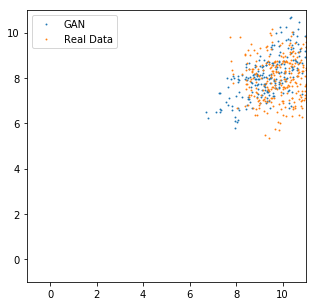

mean=[10.096262  8.675841], std=[1.5478843 1.4194682]
Epoch [10000/100000], d_loss: 0.5068, g_loss: 0.2282, D(x): 0.51, D(G(z)): 0.52


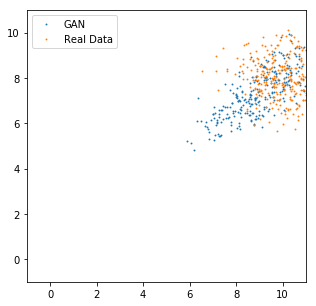

mean=[9.328866  7.6225758], std=[1.5561831 1.2864603]
Epoch [10500/100000], d_loss: 0.4897, g_loss: 0.2543, D(x): 0.51, D(G(z)): 0.50


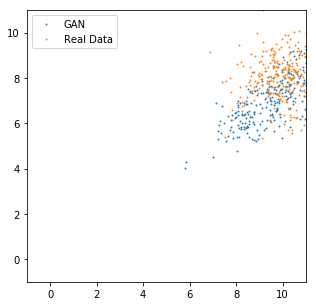

mean=[9.947239 7.315432], std=[1.4808059 1.2125137]
Epoch [11000/100000], d_loss: 0.5005, g_loss: 0.2638, D(x): 0.49, D(G(z)): 0.49


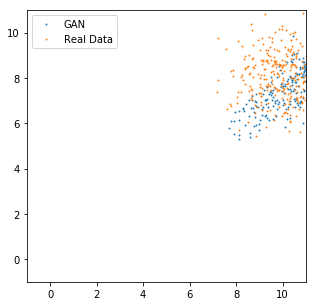

mean=[11.081863  8.017553], std=[1.6956075 1.2938354]
Epoch [11500/100000], d_loss: 0.5103, g_loss: 0.2452, D(x): 0.49, D(G(z)): 0.50


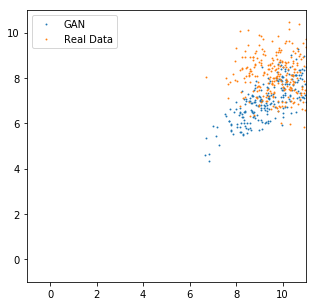

mean=[10.0162115  7.509662 ], std=[1.5609912 1.2718629]
Epoch [12000/100000], d_loss: 0.4962, g_loss: 0.2552, D(x): 0.50, D(G(z)): 0.50


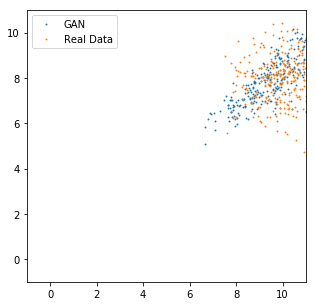

mean=[9.836356 8.169645], std=[1.4750481 1.2532855]
Epoch [12500/100000], d_loss: 0.4894, g_loss: 0.2528, D(x): 0.51, D(G(z)): 0.50


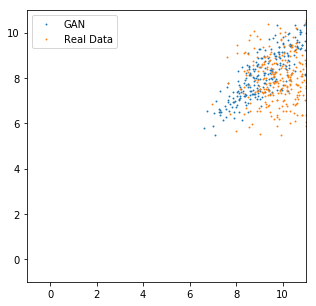

mean=[9.699239 8.61183 ], std=[1.4741727 1.4248186]
Epoch [13000/100000], d_loss: 0.5158, g_loss: 0.2400, D(x): 0.50, D(G(z)): 0.51


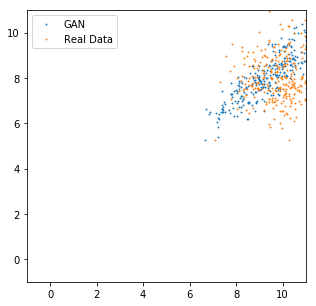

mean=[9.625391 8.328872], std=[1.435191  1.3016667]
Epoch [13500/100000], d_loss: 0.4927, g_loss: 0.2498, D(x): 0.51, D(G(z)): 0.50


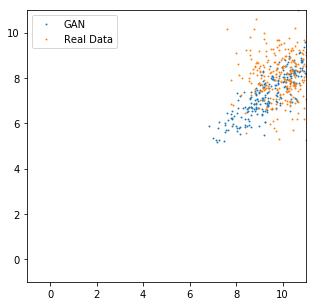

mean=[9.920646 7.660223], std=[1.4669864 1.1801583]
Epoch [14000/100000], d_loss: 0.4965, g_loss: 0.2602, D(x): 0.49, D(G(z)): 0.49


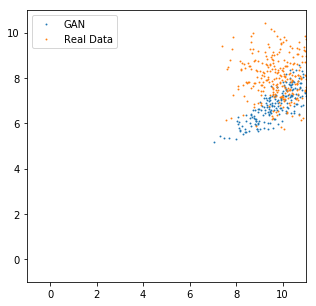

mean=[10.596365   7.4715967], std=[1.5158608 1.152424 ]
Epoch [14500/100000], d_loss: 0.5113, g_loss: 0.2519, D(x): 0.49, D(G(z)): 0.50


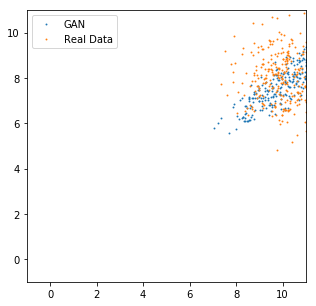

mean=[10.410224  8.029089], std=[1.4011946 1.1317463]
Epoch [15000/100000], d_loss: 0.4872, g_loss: 0.2555, D(x): 0.51, D(G(z)): 0.50


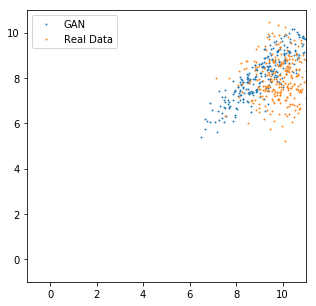

mean=[9.515617 8.476304], std=[1.4101267 1.3155822]
Epoch [15500/100000], d_loss: 0.5102, g_loss: 0.2323, D(x): 0.51, D(G(z)): 0.51


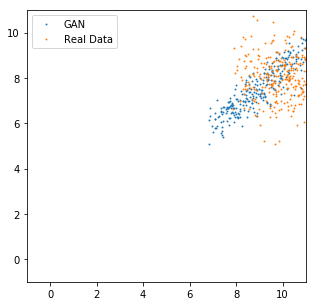

mean=[9.3080225 7.8175845], std=[1.4849087 1.2950569]
Epoch [16000/100000], d_loss: 0.4887, g_loss: 0.2593, D(x): 0.50, D(G(z)): 0.49


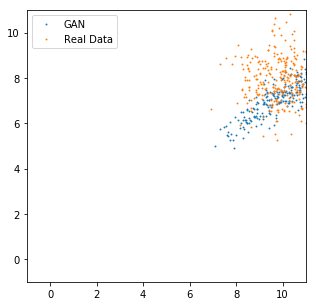

mean=[10.471399   7.5821404], std=[1.5859942 1.1927179]
Epoch [16500/100000], d_loss: 0.5178, g_loss: 0.2581, D(x): 0.48, D(G(z)): 0.49


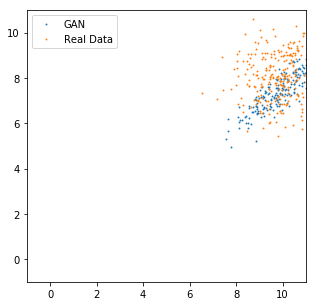

mean=[10.79631  8.12876], std=[1.5417198 1.2790111]
Epoch [17000/100000], d_loss: 0.4867, g_loss: 0.2508, D(x): 0.52, D(G(z)): 0.50


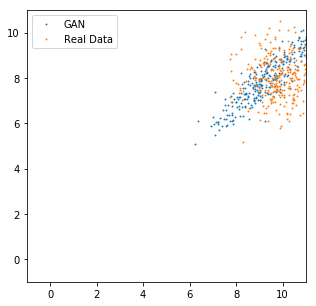

mean=[9.519138 8.133365], std=[1.3500943 1.2657514]
Epoch [17500/100000], d_loss: 0.5086, g_loss: 0.2427, D(x): 0.50, D(G(z)): 0.51


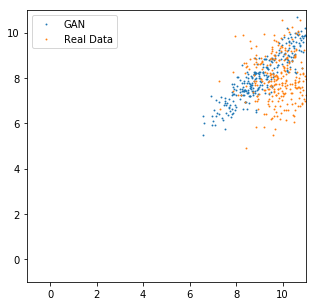

mean=[9.393412 8.360282], std=[1.4154176 1.3226743]
Epoch [18000/100000], d_loss: 0.4994, g_loss: 0.2480, D(x): 0.50, D(G(z)): 0.50


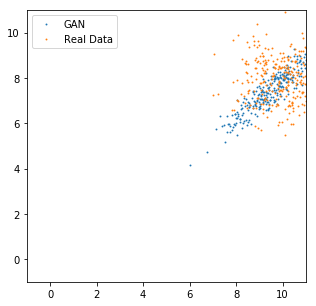

mean=[9.812356 7.701051], std=[1.3463079 1.163337 ]
Epoch [18500/100000], d_loss: 0.4968, g_loss: 0.2553, D(x): 0.50, D(G(z)): 0.49


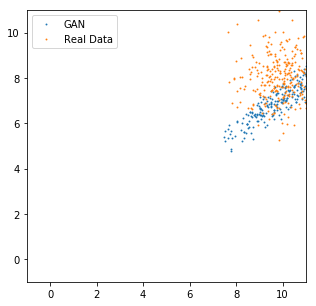

mean=[10.533955  7.500559], std=[1.6017855 1.2034693]
Epoch [19000/100000], d_loss: 0.5048, g_loss: 0.2596, D(x): 0.49, D(G(z)): 0.49


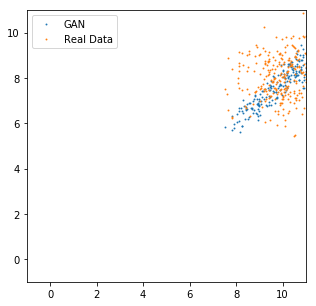

mean=[10.657702  8.355343], std=[1.5420895 1.303014 ]
Epoch [19500/100000], d_loss: 0.4886, g_loss: 0.2470, D(x): 0.52, D(G(z)): 0.50


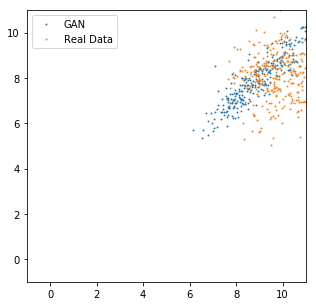

mean=[9.217184 8.187961], std=[1.4391948 1.3438779]
Epoch [20000/100000], d_loss: 0.5156, g_loss: 0.2379, D(x): 0.50, D(G(z)): 0.51


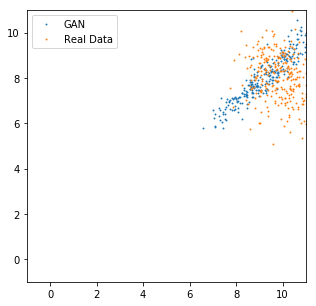

mean=[9.756672 8.51433 ], std=[1.6073552 1.4661412]
Epoch [20500/100000], d_loss: 0.4838, g_loss: 0.2585, D(x): 0.51, D(G(z)): 0.49


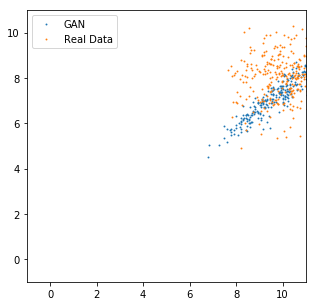

mean=[10.171955   7.5425196], std=[1.5373324 1.2355307]
Epoch [21000/100000], d_loss: 0.5117, g_loss: 0.2585, D(x): 0.48, D(G(z)): 0.49


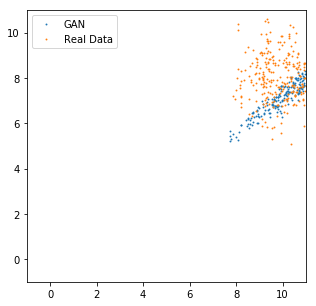

mean=[10.833188   7.8197403], std=[1.4922618 1.1661327]
Epoch [21500/100000], d_loss: 0.4881, g_loss: 0.2591, D(x): 0.50, D(G(z)): 0.49


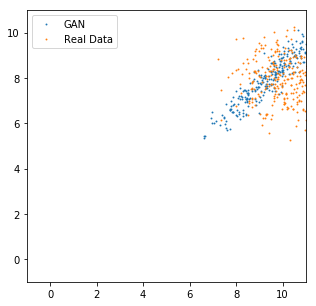

mean=[9.770039 8.305744], std=[1.419828  1.3150928]
Epoch [22000/100000], d_loss: 0.5092, g_loss: 0.2348, D(x): 0.51, D(G(z)): 0.51


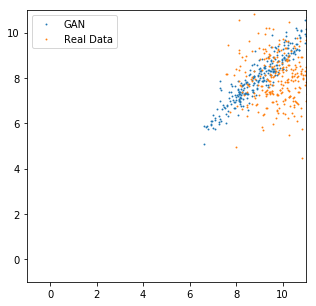

mean=[9.29125  8.306705], std=[1.4104664 1.354813 ]
Epoch [22500/100000], d_loss: 0.4891, g_loss: 0.2564, D(x): 0.51, D(G(z)): 0.49


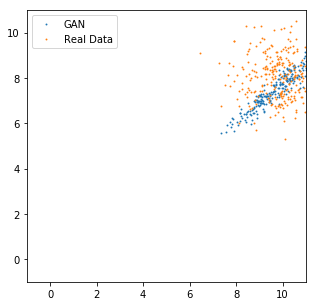

mean=[10.335518   8.0083275], std=[1.495786  1.2590044]
Epoch [23000/100000], d_loss: 0.5059, g_loss: 0.2552, D(x): 0.49, D(G(z)): 0.50


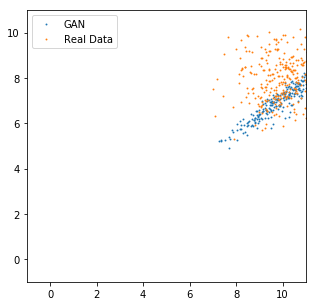

mean=[10.496668   7.4596543], std=[1.5487294 1.1930025]
Epoch [23500/100000], d_loss: 0.4973, g_loss: 0.2593, D(x): 0.50, D(G(z)): 0.49


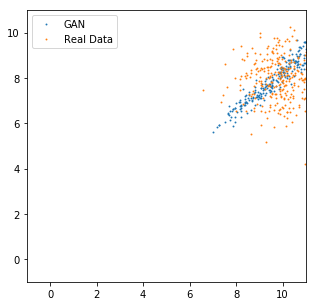

mean=[10.299567  8.50434 ], std=[1.6380581 1.4387231]
Epoch [24000/100000], d_loss: 0.5039, g_loss: 0.2334, D(x): 0.52, D(G(z)): 0.52


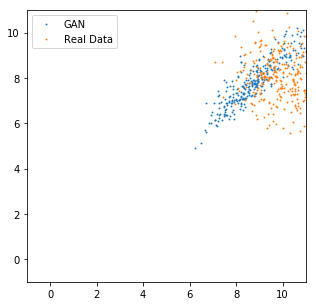

mean=[8.9919405 8.032914 ], std=[1.2981628 1.2136855]
Epoch [24500/100000], d_loss: 0.5017, g_loss: 0.2547, D(x): 0.50, D(G(z)): 0.50


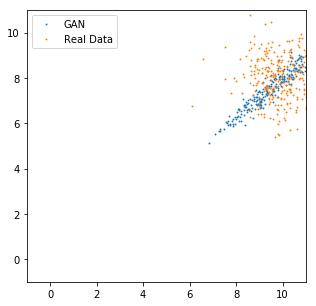

mean=[10.0787    8.044564], std=[1.4920744 1.307728 ]
Epoch [25000/100000], d_loss: 0.4962, g_loss: 0.2575, D(x): 0.50, D(G(z)): 0.49


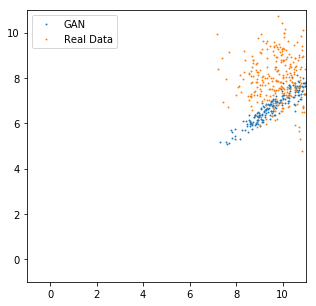

mean=[10.548326   7.4413695], std=[1.5455335 1.1590444]
Epoch [25500/100000], d_loss: 0.5047, g_loss: 0.2582, D(x): 0.49, D(G(z)): 0.49


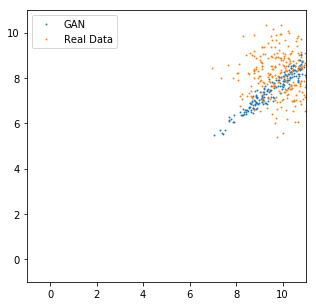

mean=[10.58321   8.348652], std=[1.695531  1.4080683]
Epoch [26000/100000], d_loss: 0.4938, g_loss: 0.2432, D(x): 0.51, D(G(z)): 0.51


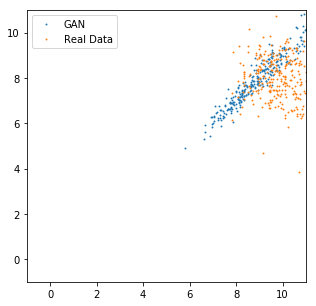

mean=[9.237838 8.236319], std=[1.5079854 1.4581809]
Epoch [26500/100000], d_loss: 0.5117, g_loss: 0.2412, D(x): 0.50, D(G(z)): 0.51


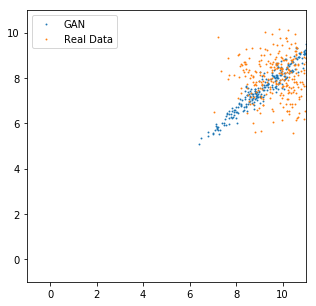

mean=[9.754568 8.065812], std=[1.6264344 1.4449586]
Epoch [27000/100000], d_loss: 0.4885, g_loss: 0.2607, D(x): 0.50, D(G(z)): 0.49


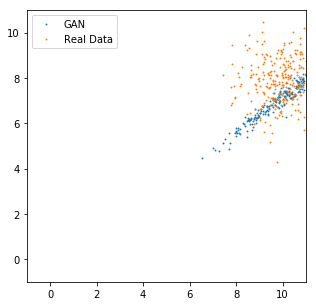

mean=[10.482496   7.5115757], std=[1.5340403 1.1982677]
Epoch [27500/100000], d_loss: 0.5172, g_loss: 0.2541, D(x): 0.48, D(G(z)): 0.50


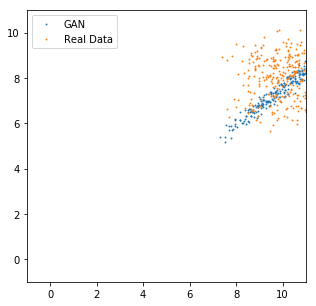

mean=[10.489613   7.9186525], std=[1.5743345 1.2561874]
Epoch [28000/100000], d_loss: 0.4886, g_loss: 0.2528, D(x): 0.51, D(G(z)): 0.50


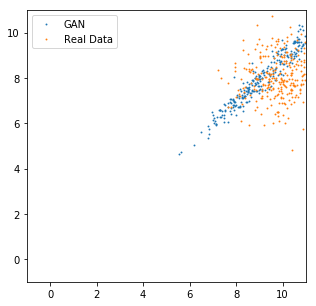

mean=[9.470383 8.330336], std=[1.5772245 1.4952083]
Epoch [28500/100000], d_loss: 0.5144, g_loss: 0.2328, D(x): 0.50, D(G(z)): 0.52


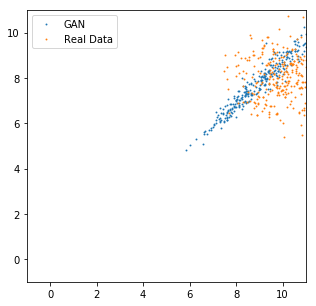

mean=[9.203017  7.9640837], std=[1.4839369 1.3757098]
Epoch [29000/100000], d_loss: 0.4858, g_loss: 0.2656, D(x): 0.50, D(G(z)): 0.49


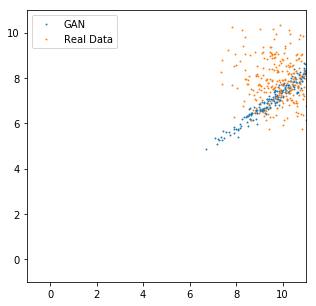

mean=[10.468179   7.7504435], std=[1.7115239 1.3575431]
Epoch [29500/100000], d_loss: 0.5124, g_loss: 0.2513, D(x): 0.49, D(G(z)): 0.50


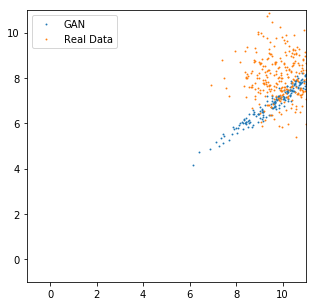

mean=[10.753986  7.765973], std=[1.7131317 1.3130476]
Epoch [30000/100000], d_loss: 0.4888, g_loss: 0.2619, D(x): 0.50, D(G(z)): 0.49


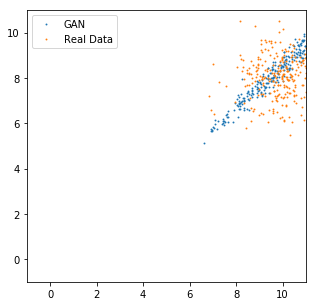

mean=[10.041615  8.546545], std=[1.6452382 1.5248495]
Epoch [30500/100000], d_loss: 0.5104, g_loss: 0.2288, D(x): 0.51, D(G(z)): 0.52


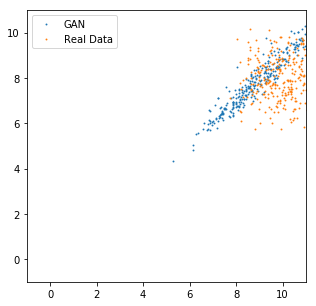

mean=[9.01236   7.9676685], std=[1.4166381 1.3684636]
Epoch [31000/100000], d_loss: 0.4929, g_loss: 0.2568, D(x): 0.50, D(G(z)): 0.49


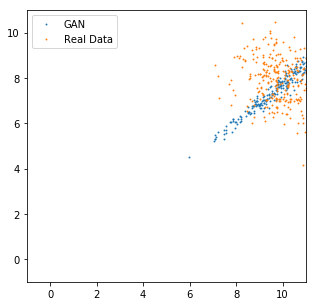

mean=[10.410322  8.04436 ], std=[1.6461403 1.3663282]
Epoch [31500/100000], d_loss: 0.5061, g_loss: 0.2550, D(x): 0.49, D(G(z)): 0.50


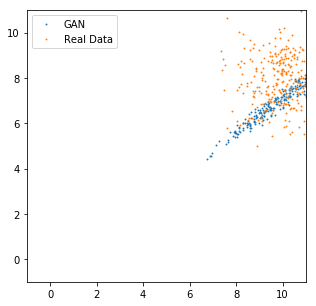

mean=[10.522786  7.502332], std=[1.7550687 1.3531958]
Epoch [32000/100000], d_loss: 0.5003, g_loss: 0.2560, D(x): 0.50, D(G(z)): 0.49


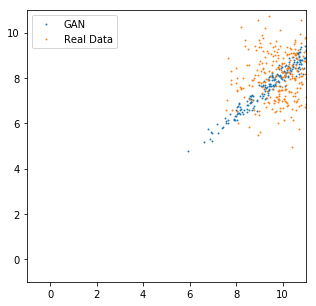

mean=[10.337357  8.432918], std=[1.7216015 1.4966655]
Epoch [32500/100000], d_loss: 0.4996, g_loss: 0.2381, D(x): 0.51, D(G(z)): 0.51


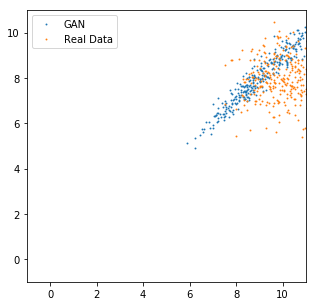

mean=[9.101959 8.123558], std=[1.2963209 1.2688888]
Epoch [33000/100000], d_loss: 0.5067, g_loss: 0.2411, D(x): 0.50, D(G(z)): 0.51


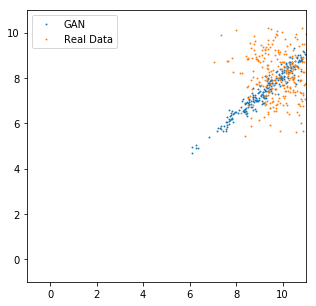

mean=[9.795967 7.934148], std=[1.555307  1.3677124]
Epoch [33500/100000], d_loss: 0.4934, g_loss: 0.2672, D(x): 0.49, D(G(z)): 0.48


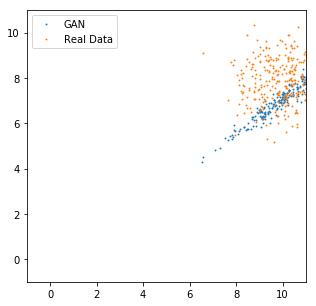

mean=[10.743935   7.6412587], std=[1.647571  1.2660453]
Epoch [34000/100000], d_loss: 0.5141, g_loss: 0.2528, D(x): 0.49, D(G(z)): 0.50


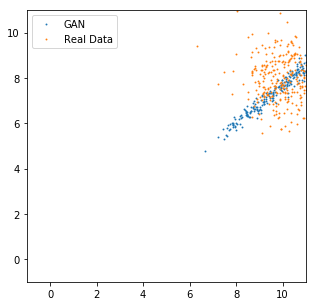

mean=[10.327856  7.908574], std=[1.5884113 1.2987282]
Epoch [34500/100000], d_loss: 0.4899, g_loss: 0.2488, D(x): 0.51, D(G(z)): 0.50


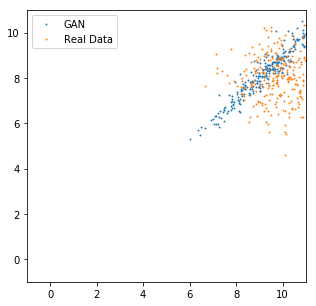

mean=[9.64329  8.622203], std=[1.4684154 1.4336618]
Epoch [35000/100000], d_loss: 0.5139, g_loss: 0.2325, D(x): 0.51, D(G(z)): 0.52


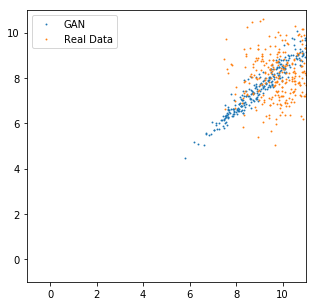

mean=[9.373037  7.8835483], std=[1.5110388 1.3518741]
Epoch [35500/100000], d_loss: 0.4851, g_loss: 0.2697, D(x): 0.50, D(G(z)): 0.48


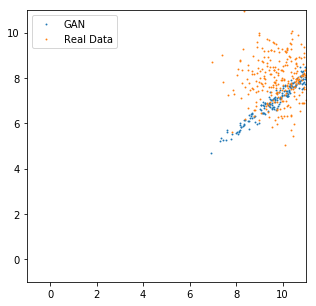

mean=[10.852364  7.918296], std=[1.7190984 1.3383925]
Epoch [36000/100000], d_loss: 0.5140, g_loss: 0.2484, D(x): 0.49, D(G(z)): 0.50


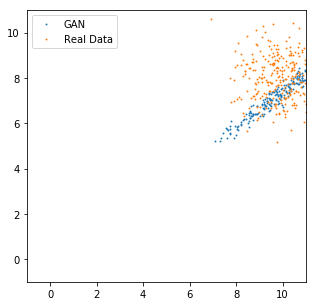

mean=[10.598659   7.8553147], std=[1.6706206 1.313124 ]
Epoch [36500/100000], d_loss: 0.4857, g_loss: 0.2590, D(x): 0.51, D(G(z)): 0.49


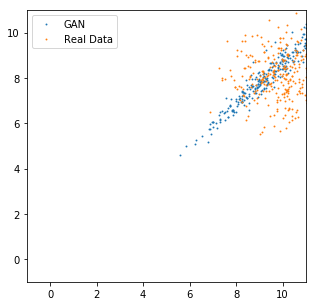

mean=[9.738732  8.4617605], std=[1.6493702 1.5612112]
Epoch [37000/100000], d_loss: 0.5154, g_loss: 0.2302, D(x): 0.51, D(G(z)): 0.52


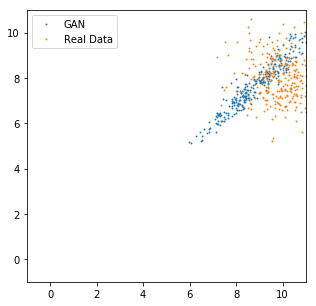

mean=[9.126412 7.952982], std=[1.4503163 1.3790737]
Epoch [37500/100000], d_loss: 0.4909, g_loss: 0.2604, D(x): 0.50, D(G(z)): 0.49


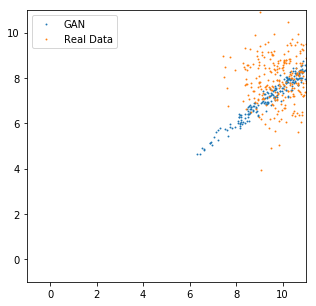

mean=[10.338553   7.8782024], std=[1.7396523 1.3961776]
Epoch [38000/100000], d_loss: 0.5048, g_loss: 0.2544, D(x): 0.49, D(G(z)): 0.50


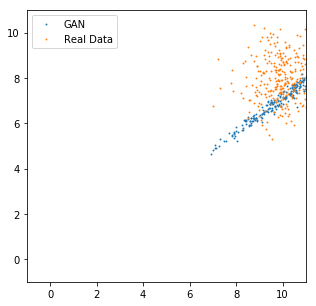

mean=[10.630868  7.590945], std=[1.8716561 1.4180211]
Epoch [38500/100000], d_loss: 0.5034, g_loss: 0.2599, D(x): 0.49, D(G(z)): 0.49


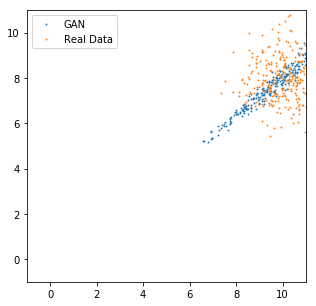

mean=[10.104356  8.101788], std=[1.6796578 1.419506 ]
Epoch [39000/100000], d_loss: 0.4966, g_loss: 0.2417, D(x): 0.51, D(G(z)): 0.51


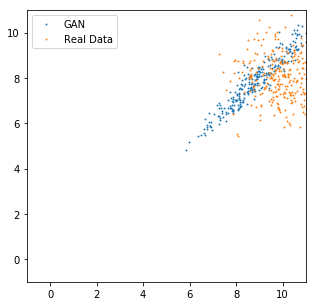

mean=[9.212666 8.226374], std=[1.566685  1.5405835]
Epoch [39500/100000], d_loss: 0.5087, g_loss: 0.2365, D(x): 0.51, D(G(z)): 0.51


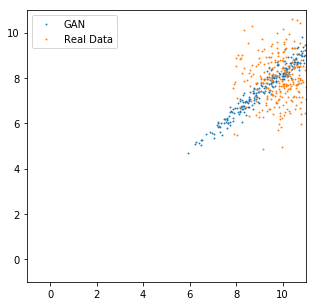

mean=[9.773807 8.083056], std=[1.6906613 1.5192637]
Epoch [40000/100000], d_loss: 0.4886, g_loss: 0.2679, D(x): 0.49, D(G(z)): 0.48


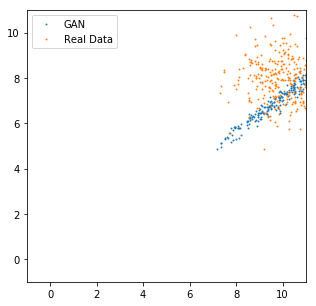

mean=[10.591325   7.6066217], std=[1.7249571 1.3183236]
Epoch [40500/100000], d_loss: 0.5154, g_loss: 0.2516, D(x): 0.48, D(G(z)): 0.50


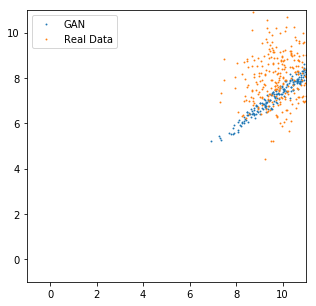

mean=[10.691222   7.9867187], std=[1.6676214 1.331251 ]
Epoch [41000/100000], d_loss: 0.4861, g_loss: 0.2562, D(x): 0.51, D(G(z)): 0.49


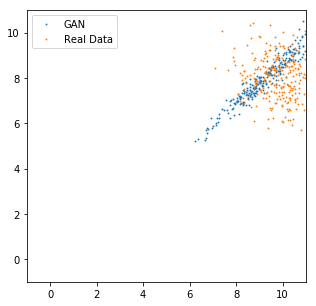

mean=[9.683292 8.413205], std=[1.5895133 1.4991298]
Epoch [41500/100000], d_loss: 0.5104, g_loss: 0.2263, D(x): 0.51, D(G(z)): 0.52


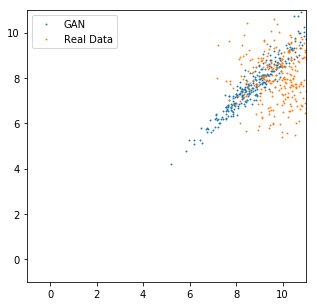

mean=[8.9841585 7.913116 ], std=[1.4069211 1.4093419]
Epoch [42000/100000], d_loss: 0.4862, g_loss: 0.2614, D(x): 0.50, D(G(z)): 0.49


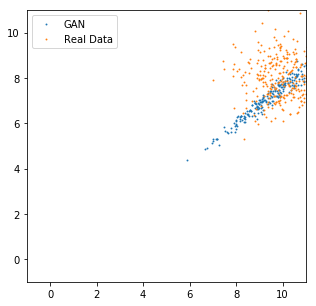

mean=[10.278953  7.838584], std=[1.8100296 1.489689 ]
Epoch [42500/100000], d_loss: 0.5071, g_loss: 0.2589, D(x): 0.48, D(G(z)): 0.49


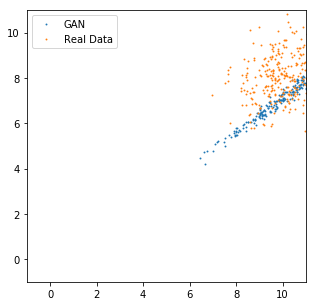

mean=[10.639249   7.5988426], std=[1.8310905 1.3934197]
Epoch [43000/100000], d_loss: 0.5001, g_loss: 0.2570, D(x): 0.49, D(G(z)): 0.49


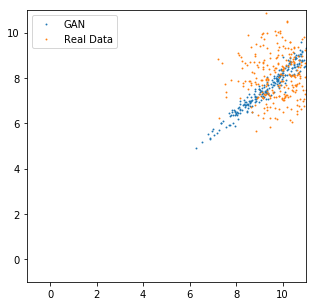

mean=[10.006544  8.161295], std=[1.6455109 1.4506716]
Epoch [43500/100000], d_loss: 0.4991, g_loss: 0.2359, D(x): 0.52, D(G(z)): 0.51


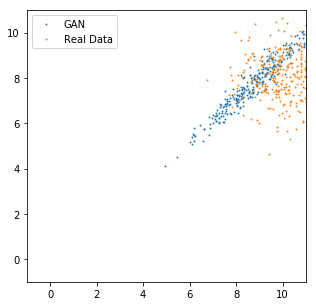

mean=[9.010141  8.0345745], std=[1.50909  1.496233]
Epoch [44000/100000], d_loss: 0.5075, g_loss: 0.2456, D(x): 0.50, D(G(z)): 0.50


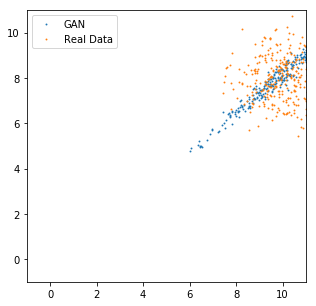

mean=[9.970174 8.147628], std=[1.5311412 1.312555 ]
Epoch [44500/100000], d_loss: 0.4886, g_loss: 0.2629, D(x): 0.50, D(G(z)): 0.49


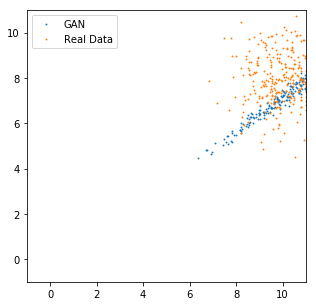

mean=[10.8114805  7.727895 ], std=[1.7816337 1.3501643]
Epoch [45000/100000], d_loss: 0.5134, g_loss: 0.2561, D(x): 0.48, D(G(z)): 0.49


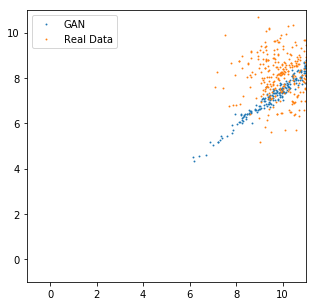

mean=[10.669308  8.059349], std=[1.855597  1.5048629]
Epoch [45500/100000], d_loss: 0.4850, g_loss: 0.2497, D(x): 0.52, D(G(z)): 0.50


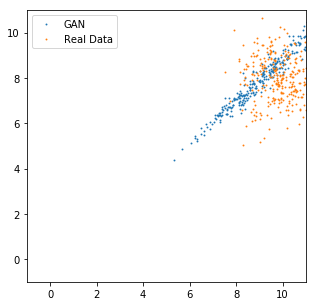

mean=[9.204067 8.085278], std=[1.4986333 1.4324962]
Epoch [46000/100000], d_loss: 0.5176, g_loss: 0.2346, D(x): 0.50, D(G(z)): 0.51


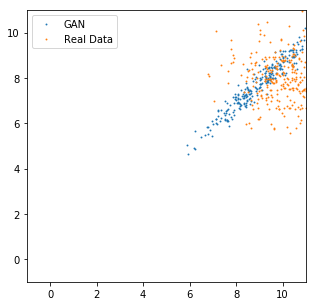

mean=[9.452786 8.189707], std=[1.585196  1.5109904]
Epoch [46500/100000], d_loss: 0.4877, g_loss: 0.2597, D(x): 0.50, D(G(z)): 0.49


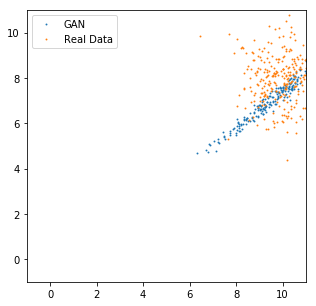

mean=[10.408668  7.721783], std=[1.7774016 1.4231366]
Epoch [47000/100000], d_loss: 0.5117, g_loss: 0.2591, D(x): 0.48, D(G(z)): 0.49


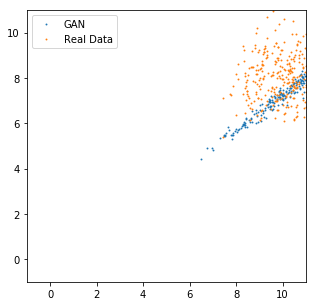

mean=[10.808708   7.8783326], std=[1.8876448 1.4765674]
Epoch [47500/100000], d_loss: 0.4889, g_loss: 0.2562, D(x): 0.51, D(G(z)): 0.49


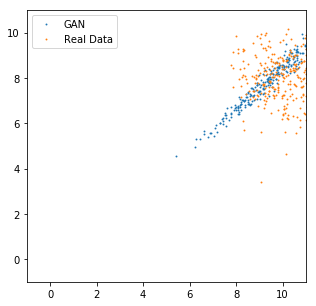

mean=[9.901359 8.372416], std=[1.723564  1.5799788]
Epoch [48000/100000], d_loss: 0.5067, g_loss: 0.2328, D(x): 0.51, D(G(z)): 0.52


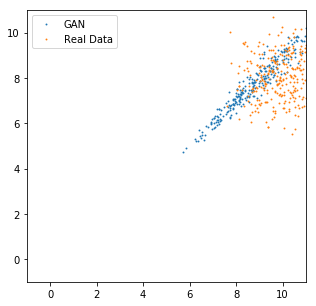

mean=[9.152502 8.085722], std=[1.5876637 1.5445706]
Epoch [48500/100000], d_loss: 0.5006, g_loss: 0.2502, D(x): 0.50, D(G(z)): 0.50


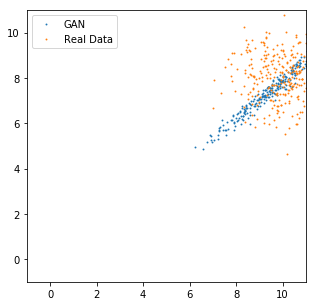

mean=[9.917722  7.8098407], std=[1.5470643 1.3190678]
Epoch [49000/100000], d_loss: 0.4971, g_loss: 0.2634, D(x): 0.49, D(G(z)): 0.49


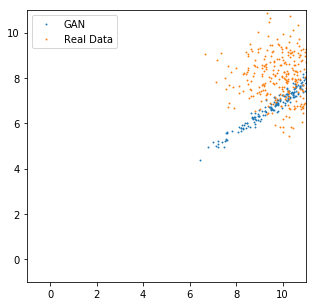

mean=[10.766917  7.657428], std=[1.7177474 1.28676  ]
Epoch [49500/100000], d_loss: 0.5105, g_loss: 0.2620, D(x): 0.48, D(G(z)): 0.49


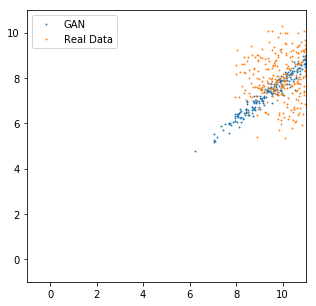

mean=[10.2851925  8.093418 ], std=[1.6756983 1.4298877]
Epoch [50000/100000], d_loss: 0.4910, g_loss: 0.2407, D(x): 0.52, D(G(z)): 0.51


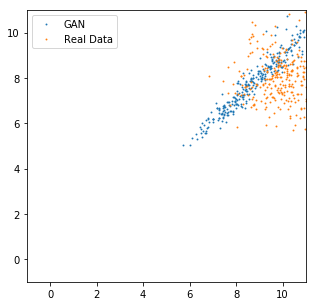

mean=[8.985443 8.036752], std=[1.4941088 1.4561688]
Epoch [50500/100000], d_loss: 0.5099, g_loss: 0.2378, D(x): 0.50, D(G(z)): 0.51


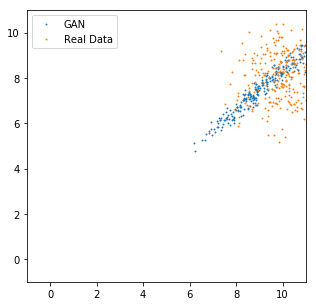

mean=[9.63989  8.038608], std=[1.6840578 1.5088115]
Epoch [51000/100000], d_loss: 0.4858, g_loss: 0.2647, D(x): 0.50, D(G(z)): 0.49


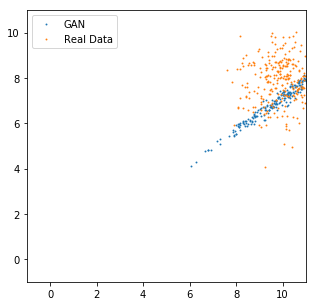

mean=[10.568566  7.610302], std=[1.7824801 1.3760754]
Epoch [51500/100000], d_loss: 0.5121, g_loss: 0.2578, D(x): 0.48, D(G(z)): 0.49


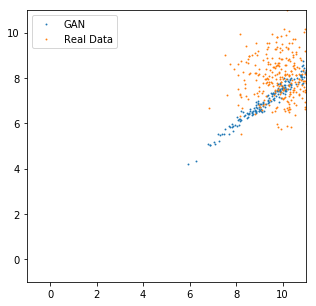

mean=[10.770356  8.154478], std=[2.0759907 1.6627011]
Epoch [52000/100000], d_loss: 0.4858, g_loss: 0.2500, D(x): 0.52, D(G(z)): 0.50


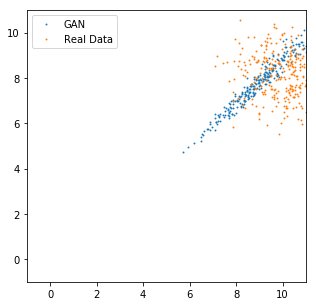

mean=[9.467225 8.284504], std=[1.6676453 1.600033 ]
Epoch [52500/100000], d_loss: 0.5108, g_loss: 0.2320, D(x): 0.51, D(G(z)): 0.52


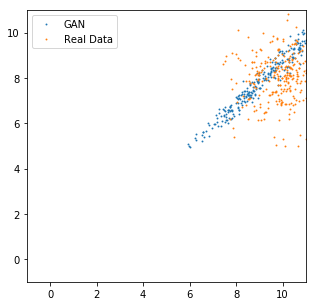

mean=[9.491365 8.240288], std=[1.6818509 1.5923955]
Epoch [53000/100000], d_loss: 0.4848, g_loss: 0.2570, D(x): 0.51, D(G(z)): 0.49


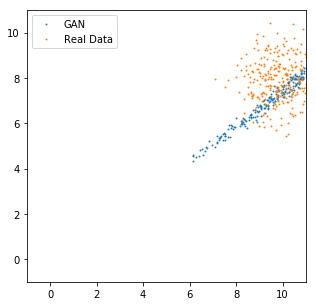

mean=[10.334877  7.703065], std=[2.0678012 1.6493101]
Epoch [53500/100000], d_loss: 0.5119, g_loss: 0.2588, D(x): 0.48, D(G(z)): 0.49


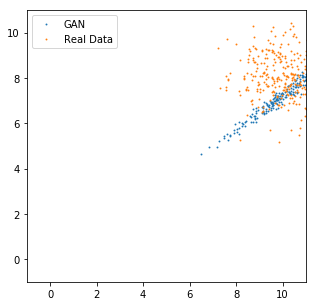

mean=[10.92311    7.9543033], std=[1.8807386 1.4667281]
Epoch [54000/100000], d_loss: 0.4896, g_loss: 0.2509, D(x): 0.51, D(G(z)): 0.50


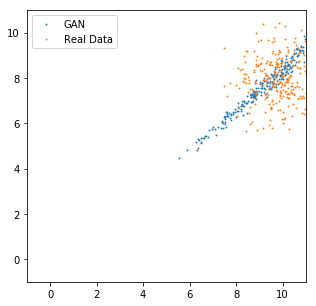

mean=[9.733467 8.123168], std=[1.7161399 1.5530478]
Epoch [54500/100000], d_loss: 0.5041, g_loss: 0.2389, D(x): 0.51, D(G(z)): 0.51


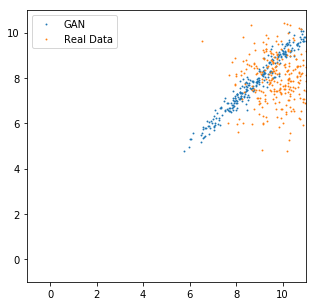

mean=[9.196064 8.199399], std=[1.6613475 1.6317754]
Epoch [55000/100000], d_loss: 0.5021, g_loss: 0.2427, D(x): 0.51, D(G(z)): 0.51


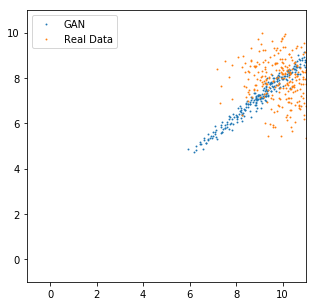

mean=[9.662197  7.7160044], std=[1.7780917 1.5143392]
Epoch [55500/100000], d_loss: 0.4938, g_loss: 0.2669, D(x): 0.49, D(G(z)): 0.48


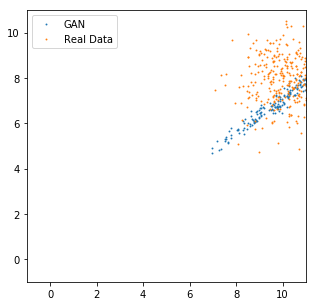

mean=[10.983871  7.827031], std=[1.8663605 1.4190314]
Epoch [56000/100000], d_loss: 0.5088, g_loss: 0.2561, D(x): 0.49, D(G(z)): 0.49


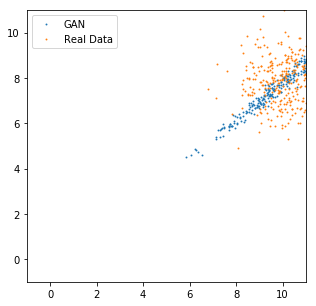

mean=[10.313034  8.063172], std=[1.883552  1.5909318]
Epoch [56500/100000], d_loss: 0.4885, g_loss: 0.2479, D(x): 0.51, D(G(z)): 0.50


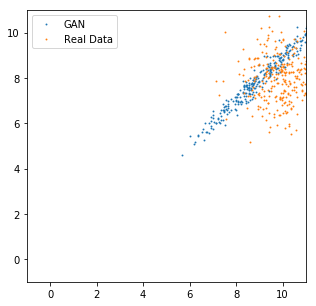

mean=[9.237247 8.190277], std=[1.5475739 1.5248758]
Epoch [57000/100000], d_loss: 0.5141, g_loss: 0.2352, D(x): 0.50, D(G(z)): 0.51


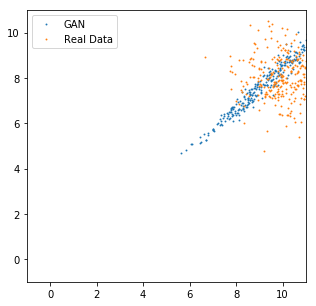

mean=[9.559678 8.079046], std=[1.7273543 1.6130931]
Epoch [57500/100000], d_loss: 0.4825, g_loss: 0.2658, D(x): 0.50, D(G(z)): 0.48


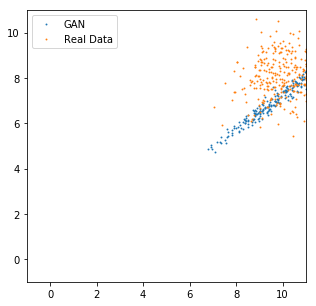

mean=[10.5698185  7.672483 ], std=[1.9672359 1.499944 ]
Epoch [58000/100000], d_loss: 0.5117, g_loss: 0.2562, D(x): 0.48, D(G(z)): 0.49


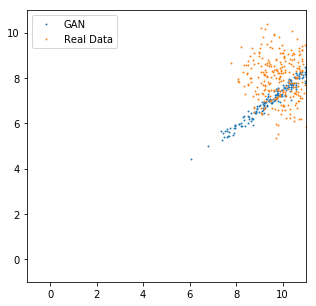

mean=[10.769676  8.044266], std=[1.8312763 1.468005 ]
Epoch [58500/100000], d_loss: 0.4866, g_loss: 0.2507, D(x): 0.51, D(G(z)): 0.50


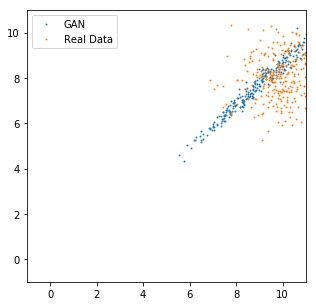

mean=[9.381236 8.093408], std=[1.7549359 1.6548852]
Epoch [59000/100000], d_loss: 0.5092, g_loss: 0.2338, D(x): 0.51, D(G(z)): 0.52


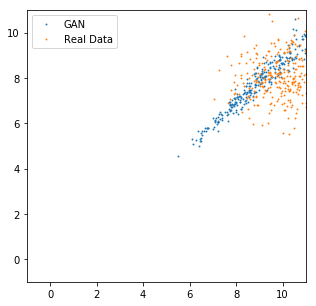

mean=[9.171332 8.00991 ], std=[1.5699801 1.5102825]
Epoch [59500/100000], d_loss: 0.4918, g_loss: 0.2554, D(x): 0.50, D(G(z)): 0.49


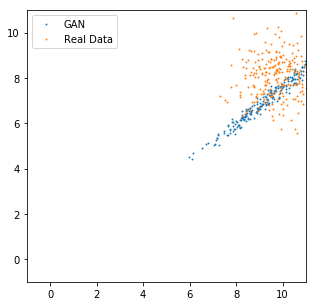

mean=[10.119834   7.6760654], std=[1.8624115 1.4995997]
Epoch [60000/100000], d_loss: 0.5069, g_loss: 0.2653, D(x): 0.48, D(G(z)): 0.48


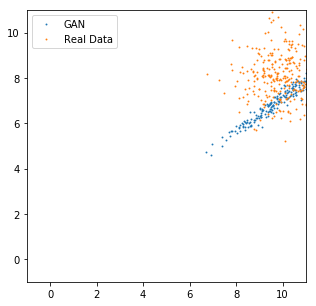

mean=[10.868234   7.8095484], std=[1.8854233 1.4460242]
Epoch [60500/100000], d_loss: 0.4926, g_loss: 0.2531, D(x): 0.51, D(G(z)): 0.50


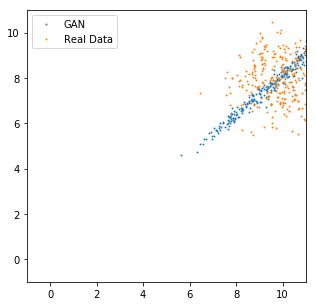

mean=[9.888441  8.0226145], std=[1.7889836 1.5658711]
Epoch [61000/100000], d_loss: 0.4969, g_loss: 0.2438, D(x): 0.51, D(G(z)): 0.51


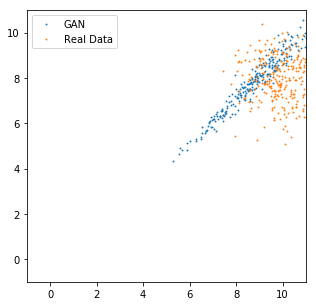

mean=[9.312514 8.340562], std=[1.7765636 1.7592394]
Epoch [61500/100000], d_loss: 0.5027, g_loss: 0.2340, D(x): 0.51, D(G(z)): 0.52


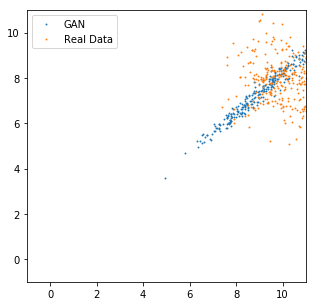

mean=[9.453992  7.7509365], std=[1.7552493 1.5626273]
Epoch [62000/100000], d_loss: 0.4887, g_loss: 0.2700, D(x): 0.49, D(G(z)): 0.48


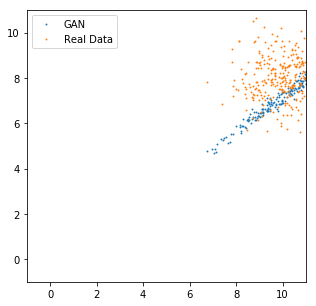

mean=[10.999772   7.9588265], std=[1.9908409 1.5445676]
Epoch [62500/100000], d_loss: 0.5149, g_loss: 0.2528, D(x): 0.48, D(G(z)): 0.50


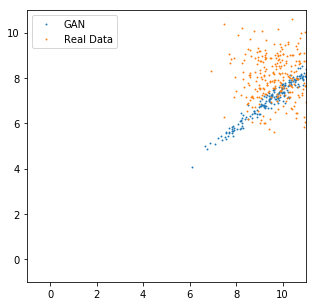

mean=[10.704702  8.021286], std=[2.0454826 1.6488472]
Epoch [63000/100000], d_loss: 0.4860, g_loss: 0.2530, D(x): 0.51, D(G(z)): 0.50


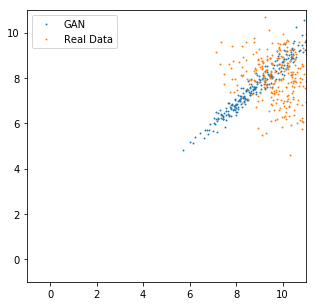

mean=[9.56507  8.277059], std=[1.7960222 1.667044 ]
Epoch [63500/100000], d_loss: 0.5138, g_loss: 0.2320, D(x): 0.51, D(G(z)): 0.52


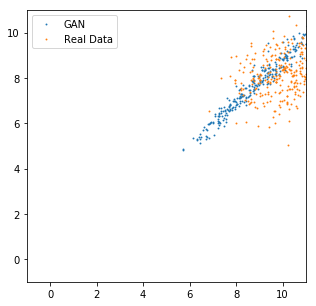

mean=[9.152548 8.019269], std=[1.6114846 1.5439904]
Epoch [64000/100000], d_loss: 0.4938, g_loss: 0.2562, D(x): 0.50, D(G(z)): 0.49


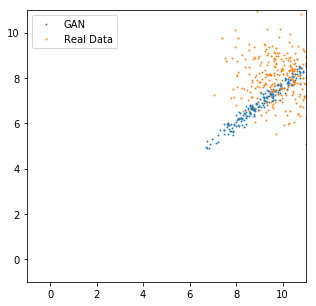

mean=[10.179496   7.7961807], std=[1.9559964 1.6105044]
Epoch [64500/100000], d_loss: 0.5053, g_loss: 0.2609, D(x): 0.48, D(G(z)): 0.49


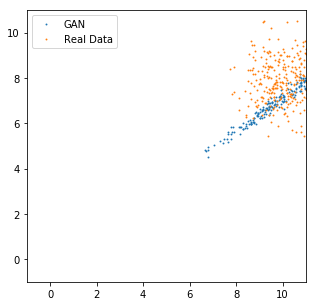

mean=[10.837414   7.7645645], std=[2.0011199 1.5091267]
Epoch [65000/100000], d_loss: 0.5003, g_loss: 0.2537, D(x): 0.50, D(G(z)): 0.50


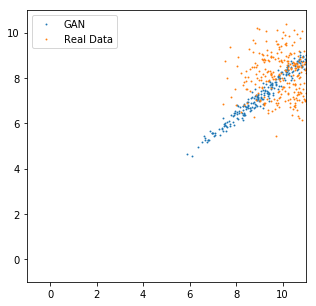

mean=[9.914888  7.9615827], std=[1.8847183 1.6232194]
Epoch [65500/100000], d_loss: 0.4945, g_loss: 0.2419, D(x): 0.51, D(G(z)): 0.51


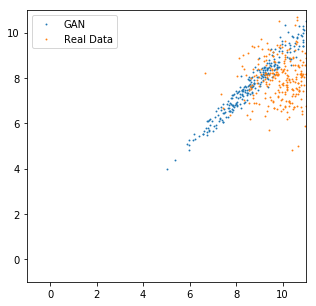

mean=[9.274367 8.280432], std=[1.8004035 1.7748613]
Epoch [66000/100000], d_loss: 0.5097, g_loss: 0.2355, D(x): 0.51, D(G(z)): 0.51


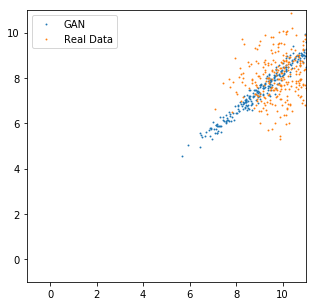

mean=[9.6179285 7.9814634], std=[1.7069073 1.5400954]
Epoch [66500/100000], d_loss: 0.4881, g_loss: 0.2668, D(x): 0.50, D(G(z)): 0.48


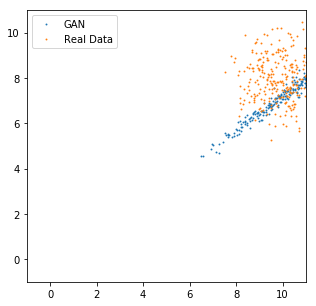

mean=[10.79474    7.8135467], std=[2.034405  1.5720445]
Epoch [67000/100000], d_loss: 0.5152, g_loss: 0.2537, D(x): 0.48, D(G(z)): 0.50


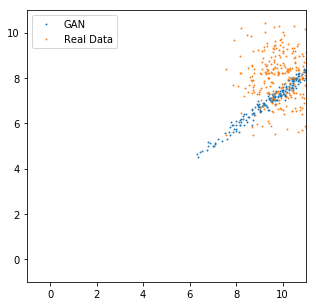

mean=[10.579303   7.9074926], std=[1.9678477 1.5723348]
Epoch [67500/100000], d_loss: 0.4874, g_loss: 0.2539, D(x): 0.51, D(G(z)): 0.50


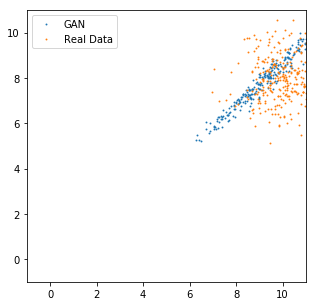

mean=[9.637748 8.296215], std=[1.6292099 1.5296681]
Epoch [68000/100000], d_loss: 0.5130, g_loss: 0.2305, D(x): 0.51, D(G(z)): 0.52


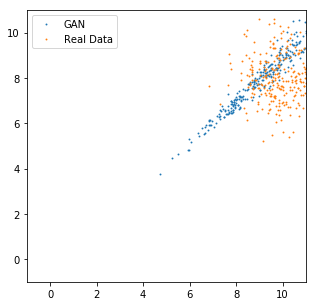

mean=[9.380642 8.264565], std=[1.7113657 1.6367549]
Epoch [68500/100000], d_loss: 0.4879, g_loss: 0.2554, D(x): 0.51, D(G(z)): 0.50


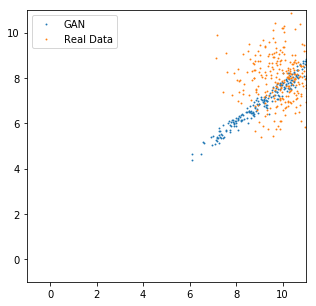

mean=[10.297195   7.9111433], std=[2.1055431 1.7406219]
Epoch [69000/100000], d_loss: 0.5043, g_loss: 0.2625, D(x): 0.48, D(G(z)): 0.49


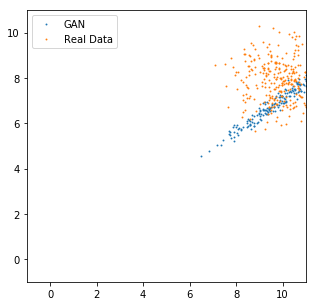

mean=[11.008822  7.86076 ], std=[2.0376043 1.5449394]
Epoch [69500/100000], d_loss: 0.4999, g_loss: 0.2555, D(x): 0.50, D(G(z)): 0.49


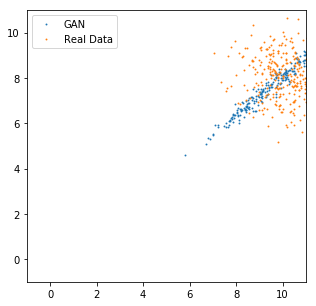

mean=[10.3263035  8.363733 ], std=[1.9782252 1.737808 ]
Epoch [70000/100000], d_loss: 0.4970, g_loss: 0.2399, D(x): 0.51, D(G(z)): 0.51


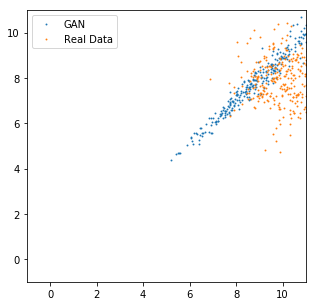

mean=[9.216228 8.183069], std=[1.8986417 1.8323913]
Epoch [70500/100000], d_loss: 0.5105, g_loss: 0.2420, D(x): 0.50, D(G(z)): 0.51


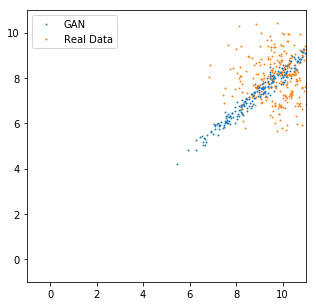

mean=[9.639074  7.9481826], std=[1.8159615 1.6234709]
Epoch [71000/100000], d_loss: 0.4868, g_loss: 0.2676, D(x): 0.50, D(G(z)): 0.48


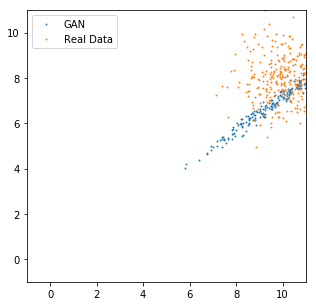

mean=[10.716168  7.736123], std=[2.1335359 1.6352305]
Epoch [71500/100000], d_loss: 0.5122, g_loss: 0.2555, D(x): 0.48, D(G(z)): 0.49


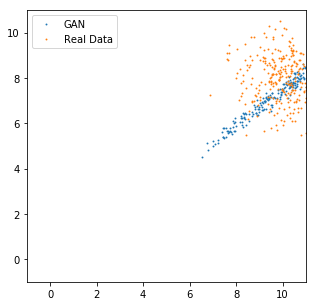

mean=[10.674982  8.001465], std=[2.0145411 1.594896 ]
Epoch [72000/100000], d_loss: 0.4864, g_loss: 0.2495, D(x): 0.52, D(G(z)): 0.50


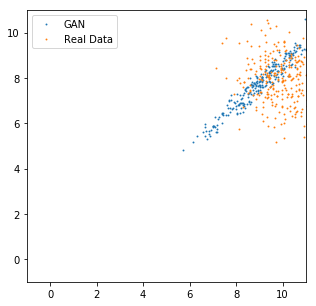

mean=[9.688345 8.373635], std=[1.8911749 1.7722621]
Epoch [72500/100000], d_loss: 0.5097, g_loss: 0.2341, D(x): 0.51, D(G(z)): 0.52


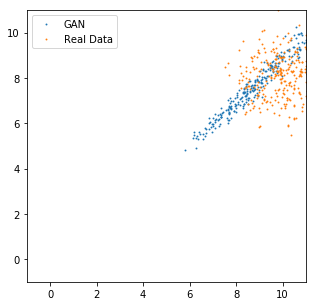

mean=[9.330162 8.172294], std=[1.841947  1.7639443]
Epoch [73000/100000], d_loss: 0.4930, g_loss: 0.2542, D(x): 0.50, D(G(z)): 0.50


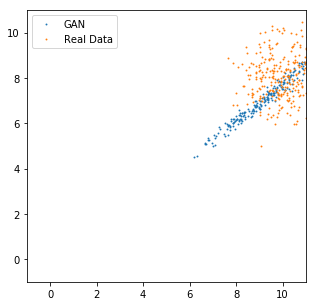

mean=[10.137382   7.8175716], std=[1.9438668 1.5833712]
Epoch [73500/100000], d_loss: 0.5037, g_loss: 0.2657, D(x): 0.48, D(G(z)): 0.48


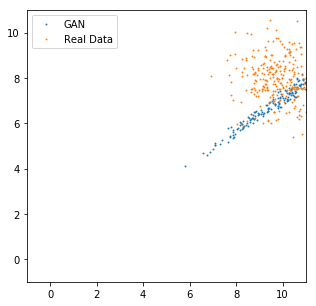

mean=[11.046263  7.930817], std=[2.200773  1.6527333]
Epoch [74000/100000], d_loss: 0.4992, g_loss: 0.2538, D(x): 0.50, D(G(z)): 0.50


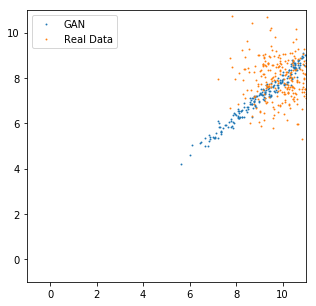

mean=[10.2072525  8.148679 ], std=[2.0934634 1.7818563]
Epoch [74500/100000], d_loss: 0.4934, g_loss: 0.2444, D(x): 0.51, D(G(z)): 0.51


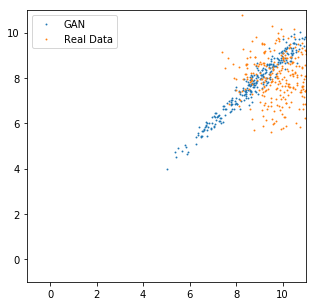

mean=[9.082254 8.055614], std=[1.7328384 1.6866826]
Epoch [75000/100000], d_loss: 0.5134, g_loss: 0.2347, D(x): 0.51, D(G(z)): 0.52


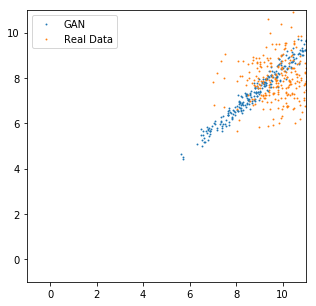

mean=[9.431186 7.938478], std=[1.8307843 1.6883712]
Epoch [75500/100000], d_loss: 0.4872, g_loss: 0.2636, D(x): 0.50, D(G(z)): 0.49


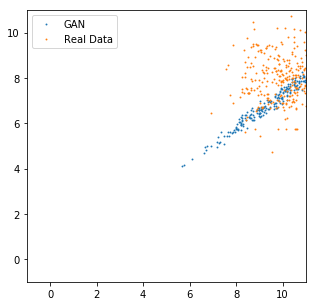

mean=[10.435569   7.6472616], std=[2.0314875 1.5569533]
Epoch [76000/100000], d_loss: 0.5121, g_loss: 0.2586, D(x): 0.48, D(G(z)): 0.49


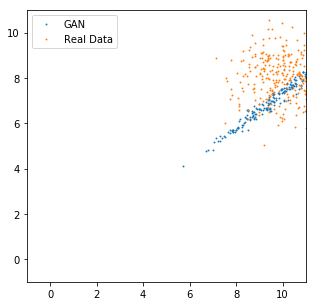

mean=[10.818079   7.9781895], std=[2.1824868 1.7026615]
Epoch [76500/100000], d_loss: 0.4928, g_loss: 0.2534, D(x): 0.50, D(G(z)): 0.50


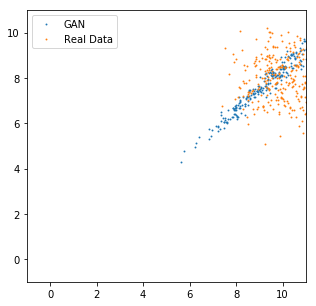

mean=[9.992186 8.402306], std=[1.8790439 1.721602 ]
Epoch [77000/100000], d_loss: 0.5052, g_loss: 0.2341, D(x): 0.51, D(G(z)): 0.52


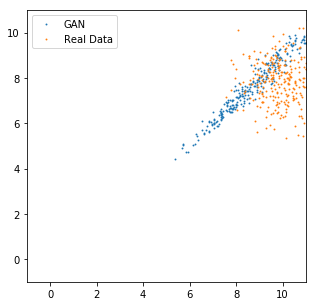

mean=[9.186044  8.1242695], std=[1.7807876 1.7221404]
Epoch [77500/100000], d_loss: 0.5002, g_loss: 0.2459, D(x): 0.51, D(G(z)): 0.50


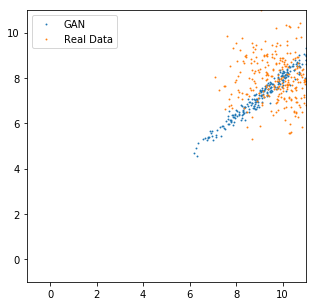

mean=[9.902629 7.941222], std=[1.8593993 1.6058184]
Epoch [78000/100000], d_loss: 0.4918, g_loss: 0.2645, D(x): 0.49, D(G(z)): 0.48


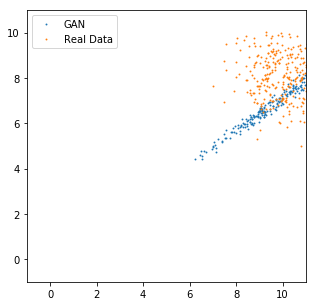

mean=[10.522299   7.5751147], std=[2.100257  1.6077411]
Epoch [78500/100000], d_loss: 0.5106, g_loss: 0.2566, D(x): 0.48, D(G(z)): 0.49


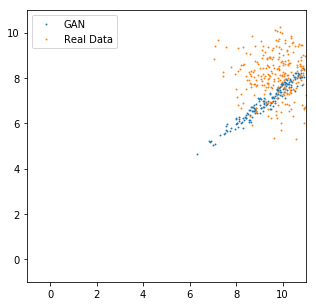

mean=[10.777917  8.137974], std=[1.9861587 1.592638 ]
Epoch [79000/100000], d_loss: 0.4863, g_loss: 0.2525, D(x): 0.51, D(G(z)): 0.50


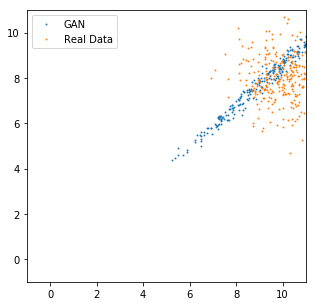

mean=[9.821138 8.482194], std=[2.2739708 2.1192503]
Epoch [79500/100000], d_loss: 0.5087, g_loss: 0.2329, D(x): 0.51, D(G(z)): 0.52


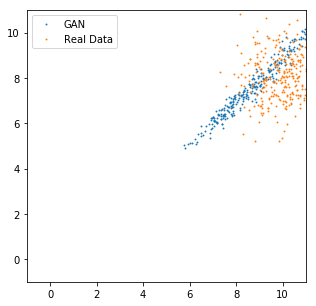

mean=[9.056716 7.96379 ], std=[1.6949044 1.6494755]
Epoch [80000/100000], d_loss: 0.4946, g_loss: 0.2523, D(x): 0.50, D(G(z)): 0.50


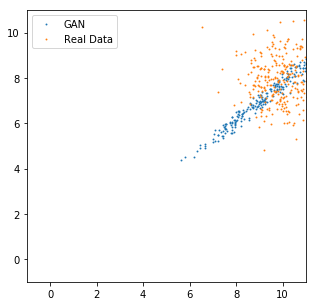

mean=[10.074503   7.8598228], std=[2.1256547 1.7900535]
Epoch [80500/100000], d_loss: 0.4982, g_loss: 0.2650, D(x): 0.49, D(G(z)): 0.49


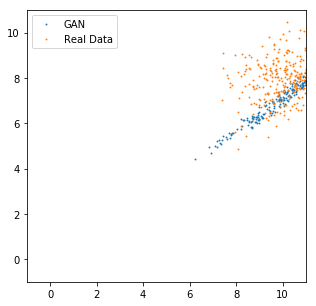

mean=[11.010431   7.8807535], std=[2.1266804 1.6056824]
Epoch [81000/100000], d_loss: 0.5037, g_loss: 0.2489, D(x): 0.50, D(G(z)): 0.50


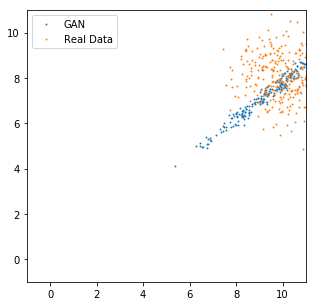

mean=[10.26718   8.060724], std=[2.03063   1.6849732]
Epoch [81500/100000], d_loss: 0.4886, g_loss: 0.2471, D(x): 0.52, D(G(z)): 0.50


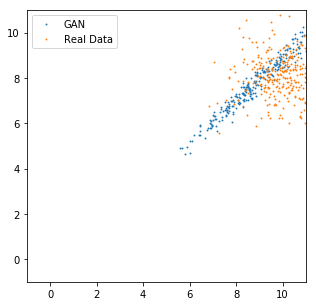

mean=[9.29447 8.21875], std=[1.7134619 1.6623032]
Epoch [82000/100000], d_loss: 0.5155, g_loss: 0.2351, D(x): 0.50, D(G(z)): 0.52


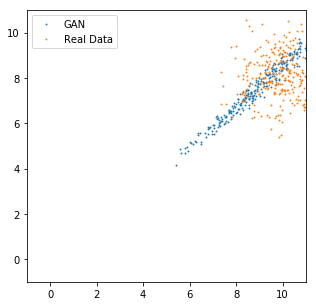

mean=[9.240986  7.8513966], std=[1.7319205 1.5913972]
Epoch [82500/100000], d_loss: 0.4894, g_loss: 0.2648, D(x): 0.50, D(G(z)): 0.49


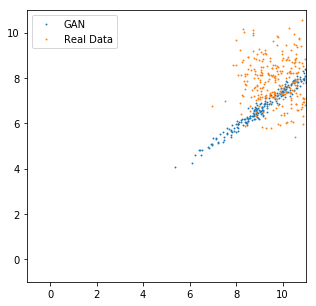

mean=[10.173403   7.5084186], std=[2.005208  1.5489575]
Epoch [83000/100000], d_loss: 0.5102, g_loss: 0.2595, D(x): 0.48, D(G(z)): 0.49


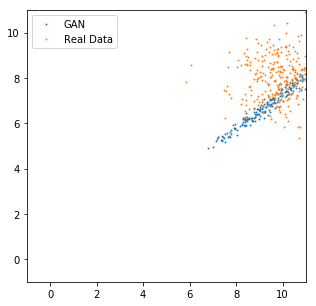

mean=[10.79958   7.918934], std=[2.3477495 1.8224136]
Epoch [83500/100000], d_loss: 0.4889, g_loss: 0.2523, D(x): 0.51, D(G(z)): 0.50


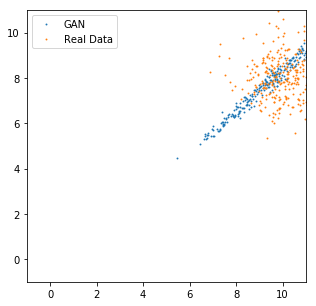

mean=[9.885067 8.242804], std=[1.8259323 1.6846055]
Epoch [84000/100000], d_loss: 0.5026, g_loss: 0.2384, D(x): 0.51, D(G(z)): 0.51


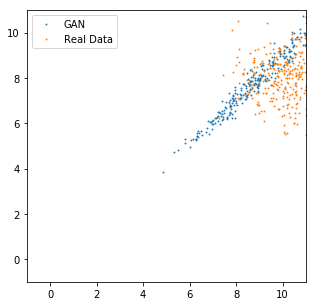

mean=[9.2823715 8.281005 ], std=[1.9063054 1.8659091]
Epoch [84500/100000], d_loss: 0.5048, g_loss: 0.2451, D(x): 0.50, D(G(z)): 0.50


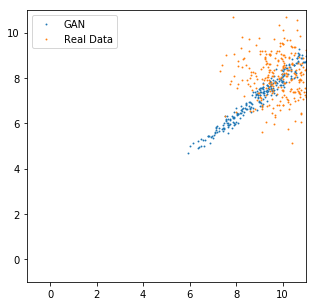

mean=[9.618888 7.74321 ], std=[1.8736544 1.6438051]
Epoch [85000/100000], d_loss: 0.4915, g_loss: 0.2698, D(x): 0.49, D(G(z)): 0.48


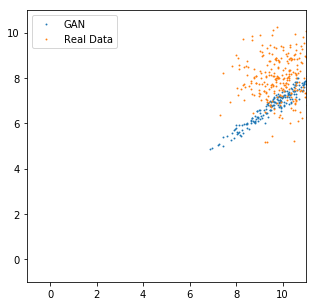

mean=[10.863092  7.755705], std=[1.9982944 1.5247742]
Epoch [85500/100000], d_loss: 0.5084, g_loss: 0.2522, D(x): 0.49, D(G(z)): 0.50


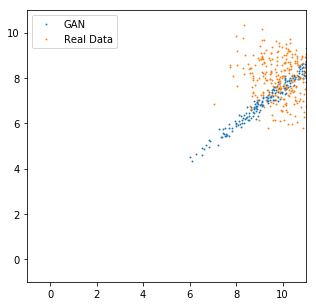

mean=[10.597669  8.090946], std=[2.1668556 1.7868533]
Epoch [86000/100000], d_loss: 0.4885, g_loss: 0.2488, D(x): 0.51, D(G(z)): 0.50


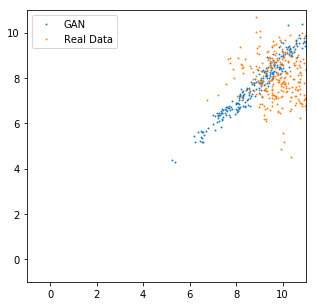

mean=[9.644401 8.466071], std=[2.0308764 1.964431 ]
Epoch [86500/100000], d_loss: 0.5122, g_loss: 0.2307, D(x): 0.51, D(G(z)): 0.52


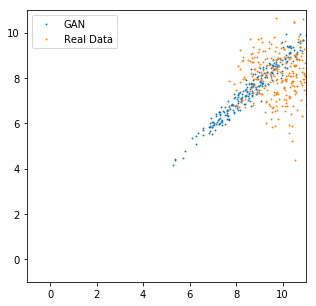

mean=[9.257339 8.063083], std=[1.8377333 1.7319582]
Epoch [87000/100000], d_loss: 0.4903, g_loss: 0.2581, D(x): 0.50, D(G(z)): 0.49


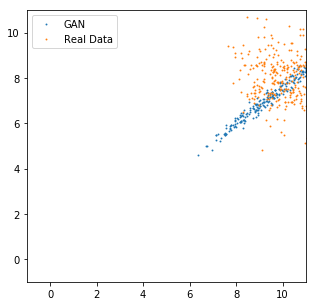

mean=[10.271161   7.8221955], std=[1.9570013 1.5997659]
Epoch [87500/100000], d_loss: 0.5057, g_loss: 0.2626, D(x): 0.48, D(G(z)): 0.49


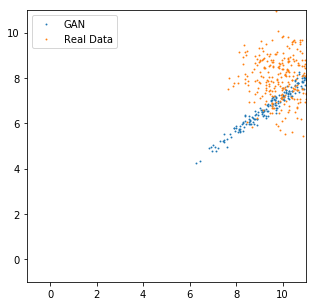

mean=[10.813574   7.7761865], std=[2.1053517 1.6059998]
Epoch [88000/100000], d_loss: 0.5036, g_loss: 0.2538, D(x): 0.49, D(G(z)): 0.50


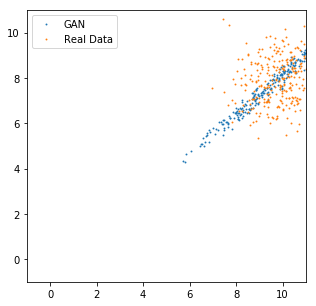

mean=[9.913809 8.056333], std=[1.8701333 1.6464427]
Epoch [88500/100000], d_loss: 0.4968, g_loss: 0.2397, D(x): 0.51, D(G(z)): 0.51


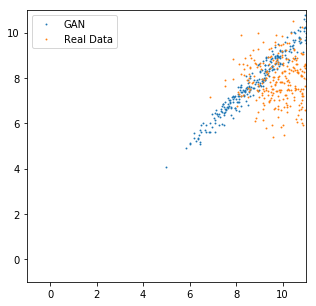

mean=[9.370693  8.4100895], std=[1.8842446 1.8724612]
Epoch [89000/100000], d_loss: 0.5077, g_loss: 0.2379, D(x): 0.51, D(G(z)): 0.51


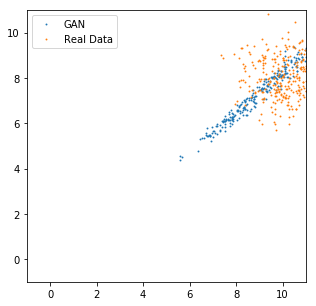

mean=[9.594889 7.876011], std=[2.0372179 1.8082565]
Epoch [89500/100000], d_loss: 0.4885, g_loss: 0.2698, D(x): 0.49, D(G(z)): 0.48


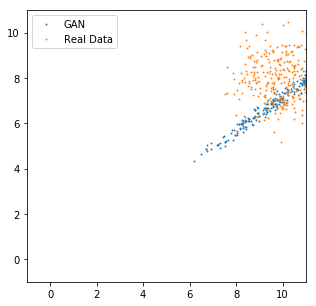

mean=[10.749269  7.758549], std=[2.3710096 1.8190584]
Epoch [90000/100000], d_loss: 0.5098, g_loss: 0.2574, D(x): 0.49, D(G(z)): 0.49


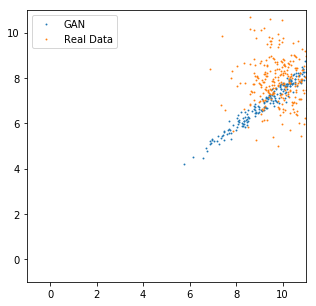

mean=[10.618353  8.000084], std=[2.209313  1.7999446]
Epoch [90500/100000], d_loss: 0.4860, g_loss: 0.2478, D(x): 0.52, D(G(z)): 0.50


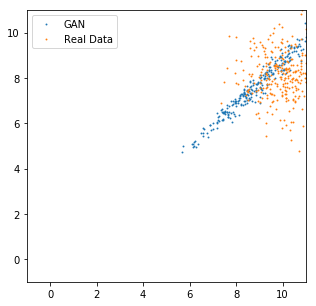

mean=[9.392381 8.165817], std=[1.8770399 1.8058865]
Epoch [91000/100000], d_loss: 0.5134, g_loss: 0.2303, D(x): 0.51, D(G(z)): 0.52


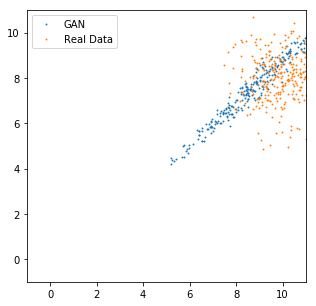

mean=[9.148168 7.974971], std=[1.9277897 1.8420055]
Epoch [91500/100000], d_loss: 0.4866, g_loss: 0.2609, D(x): 0.50, D(G(z)): 0.49


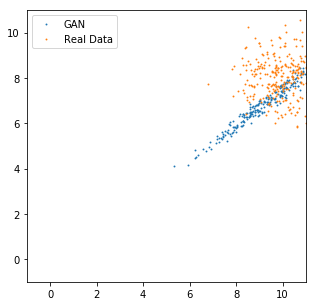

mean=[10.071331   7.5528245], std=[2.0637898 1.6547791]
Epoch [92000/100000], d_loss: 0.5125, g_loss: 0.2582, D(x): 0.48, D(G(z)): 0.49


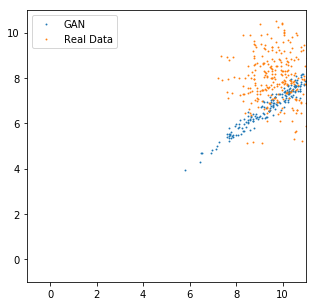

mean=[10.909077   7.9012785], std=[2.340878  1.8363919]
Epoch [92500/100000], d_loss: 0.4944, g_loss: 0.2533, D(x): 0.50, D(G(z)): 0.50


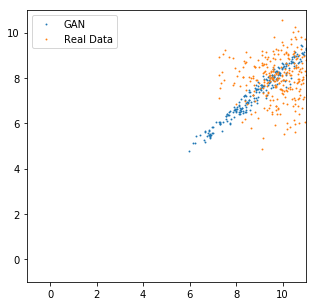

mean=[9.868095 8.223164], std=[2.0451224 1.8322326]
Epoch [93000/100000], d_loss: 0.5056, g_loss: 0.2349, D(x): 0.51, D(G(z)): 0.52


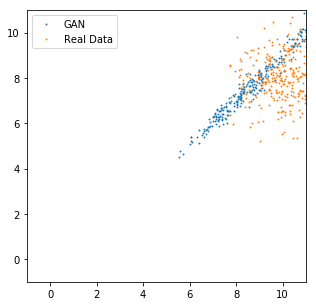

mean=[9.16259  8.142987], std=[1.9198158 1.8813057]
Epoch [93500/100000], d_loss: 0.4986, g_loss: 0.2497, D(x): 0.50, D(G(z)): 0.50


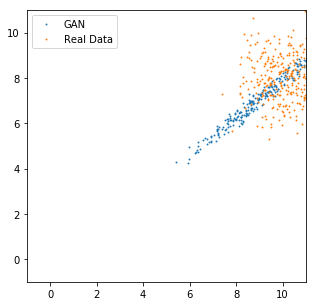

mean=[9.747882  7.7279606], std=[2.1449318 1.8336618]
Epoch [94000/100000], d_loss: 0.4963, g_loss: 0.2659, D(x): 0.49, D(G(z)): 0.48


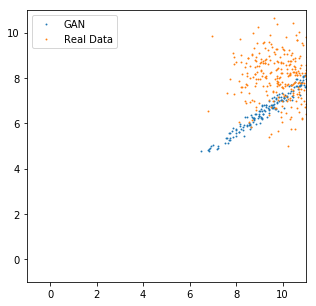

mean=[10.994512  7.857187], std=[2.3472676 1.7579461]
Epoch [94500/100000], d_loss: 0.5085, g_loss: 0.2535, D(x): 0.49, D(G(z)): 0.50


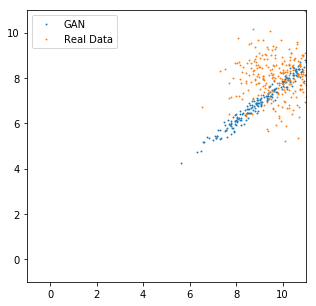

mean=[10.357335  8.06193 ], std=[2.2664394 1.881822 ]
Epoch [95000/100000], d_loss: 0.4903, g_loss: 0.2459, D(x): 0.51, D(G(z)): 0.50


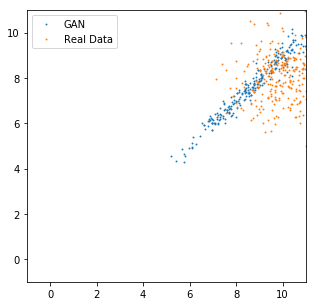

mean=[9.340645 8.284092], std=[1.9746374 1.9305648]
Epoch [95500/100000], d_loss: 0.5144, g_loss: 0.2359, D(x): 0.50, D(G(z)): 0.51


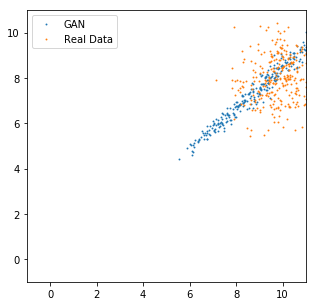

mean=[9.284983 7.835904], std=[1.9289914 1.7812556]
Epoch [96000/100000], d_loss: 0.4860, g_loss: 0.2665, D(x): 0.50, D(G(z)): 0.48


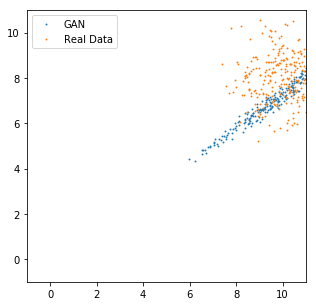

mean=[10.499553  7.706569], std=[2.1761675 1.7091434]
Epoch [96500/100000], d_loss: 0.5106, g_loss: 0.2553, D(x): 0.49, D(G(z)): 0.50


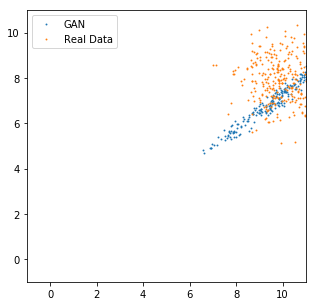

mean=[10.652702  7.800734], std=[2.2057388 1.7297233]
Epoch [97000/100000], d_loss: 0.4920, g_loss: 0.2541, D(x): 0.51, D(G(z)): 0.50


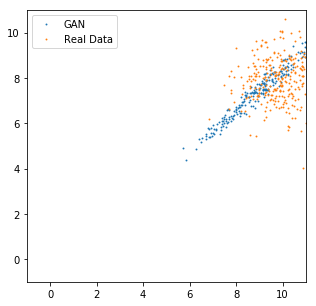

mean=[9.84097  8.225874], std=[2.0636897 1.8717165]
Epoch [97500/100000], d_loss: 0.5021, g_loss: 0.2358, D(x): 0.51, D(G(z)): 0.52


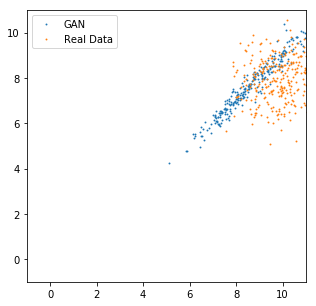

mean=[9.237621 8.246946], std=[1.9686674 1.9209188]
Epoch [98000/100000], d_loss: 0.5038, g_loss: 0.2433, D(x): 0.51, D(G(z)): 0.51


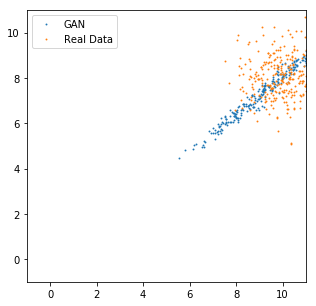

mean=[9.7902775 7.931858 ], std=[1.9843235 1.7320673]
Epoch [98500/100000], d_loss: 0.4916, g_loss: 0.2648, D(x): 0.49, D(G(z)): 0.49


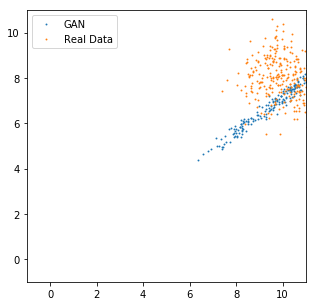

mean=[10.832867   7.7903214], std=[2.186106 1.680883]
Epoch [99000/100000], d_loss: 0.5138, g_loss: 0.2540, D(x): 0.48, D(G(z)): 0.50


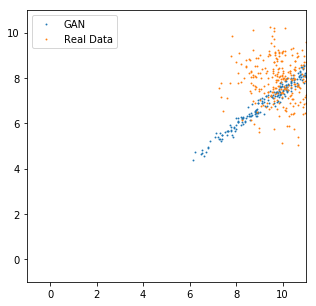

mean=[10.58291   7.982779], std=[2.2260826 1.7996982]
Epoch [99500/100000], d_loss: 0.4868, g_loss: 0.2494, D(x): 0.51, D(G(z)): 0.50


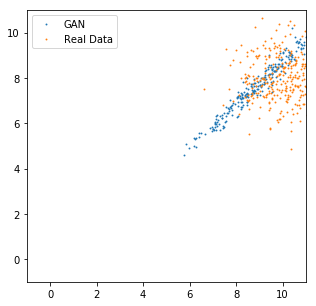

mean=[9.627257 8.358343], std=[1.9596373 1.8715824]


In [17]:
for epoch in range(max_epoch):
    
    # Build mini-batch dataset
    x = Variable(sample_real(batch_size)).to(device)

    # Create the labels which are later used as input for the BCE loss
    real_labels = Variable(torch.ones(batch_size,1)).to(device)
    fake_labels = Variable(torch.zeros(batch_size,1)).to(device)


    #============= Train the discriminator =============#
    # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
    # Second term of the loss is always zero since real_labels == 1    
    outputs = D(x)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs

    # Compute BCELoss using fake images
    # First term of the loss is always zero since fake_labels == 0    
    z = Variable(torch.randn(batch_size, z_dim)).to(device)
    fake_images = G(z).detach()
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs

    # Backprop + Optimize
    d_loss = d_loss_real + d_loss_fake
    D.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    #=============== Train the generator ===============#
    z = Variable(torch.randn(batch_size, z_dim)).to(device)
    fake_images = G(z)
    outputs = D(fake_images)

    # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
    g_loss = criterion(outputs, real_labels)

    # Backprop + Optimize
    D.zero_grad()
    G.zero_grad()
    g_loss.backward()
    g_optimizer.step()
    
    if epoch%500==0:
#         print('epoch={}, loss={}'.format(epoch,loss.data.numpy()[0]))
        print('Epoch [%d/%d], d_loss: %.4f, g_loss: %.4f, D(x): %.2f, D(G(z)): %.2f'
              %(epoch, max_epoch, d_loss.item(), g_loss.item(), real_score.mean().item(), fake_score.mean().item()))

    if epoch%500==0:
        mean, std = plot_decoder()
        plt.show()
        print('mean={}, std={}'.format(mean, std))
